# Credit Score Prediction – EDA & Machine Learning
Author: Ramashish Sahani  

This notebook covers:  
1. Data Cleaning & Quality Check  
2. Univariate Analysis  
3. Bivariate Analysis  
4. Feature Engineering  
5. Machine Learning Model  
6. Evaluation & Insights  

The goal is to **analyze customer financial behavior** and **predict Credit Score** (Good / Standard / Poor).  


### 🔹 Data Quality & Cleaning Questions
- What is the percentage of **missing values** in each column, and how should they be treated (imputation, dropping, domain logic)?  
- Are there **duplicate SSNs or Names** (possible data quality issue)?  
- Is **Age** distributed within realistic ranges (e.g., 18–100)? Any outliers?  
- Are there invalid or unrealistic values in **Annual_Income**, **Monthly_Inhand_Salary**, or **Outstanding_Debt**?  
- Is **Monthly_Balance** consistent with `(Income – Expenses – EMI)`?  
- Do categorical columns (**Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount, Type_of_Loan**) have unexpected categories?  

---

### 🔹 Univariate Analysis (Single Feature Insights)
- What is the distribution of **Credit_Score classes** (balanced vs. imbalanced)?  
- What is the distribution of **Age** in the dataset? Do younger vs older applicants differ in credit risk?  
- How is **Annual_Income** distributed? Is it skewed?  
- What is the most common **Occupation** type among applicants?  
- What are the most frequent loan types in **Type_of_Loan**?  
- How does **Credit_History_Age** vary across customers?  

---

### 🔹 Bivariate & Relationship Questions
- Does higher **Annual_Income** correlate with better `Credit_Score`?  
- How does **Monthly_Inhand_Salary** affect `Outstanding_Debt`?  
- Do people with more **Num_Bank_Accounts** have better or worse `Credit_Score`?  
- Is there a relationship between **Num_Credit_Card** and `Credit_Utilization_Ratio`?  
- Does **Num_of_Delayed_Payment** strongly correlate with poor credit score?  
- How do **Interest_Rate** and **Total_EMI_per_month** affect `Monthly_Balance`?  
- Is there a difference in credit score distribution across different **Credit_Mix** types?  
- Does **Payment_Behaviour** indicate future default risk?  


### 🔹 Time-based & Behavioral Analysis
- Are there seasonal patterns in **Month** (e.g., more defaults in festive/holiday seasons)?  
- How does **Changed_Credit_Limit** over time affect customer’s creditworthiness?  
- Do frequent **Num_Credit_Inquiries** indicate lower credit scores?  
- Are customers who *"pay only minimum"* (**Payment_of_Min_Amount = Yes**) more likely to have bad credit?  

---

### 🔹 Risk Indicators
- What is the average **Credit_Utilization_Ratio** for each credit score category?  
- How much **Outstanding_Debt** do defaulters usually carry compared to good scorers?  
- Are people with multiple loans (**Num_of_Loan**) more likely to have bad credit?  
- Is high **Num_of_Delayed_Payment** a strong predictor of poor credit score?  
- Is there a threshold in **Credit_History_Age** beyond which credit risk reduces?  

---

### 🔹 Feature Engineering Opportunities
- Can we derive **Debt-to-Income Ratio** = `Outstanding_Debt / Annual_Income`?  
- Can we compute **EMI-to-Income Ratio** = `Total_EMI_per_month / Monthly_Inhand_Salary`?  
- Can we create a **Savings Ratio** = `Monthly_Balance / Monthly_Inhand_Salary`?  
- Can we create a flag for **High Credit Utilization** (e.g., >70%)?  

---

### 🔹 Modeling Preparation Questions
- Which features are most correlated with **Credit_Score**?  
- Do categorical variables need encoding (Label Encoding, One-Hot Encoding)?  
- Is the dataset imbalanced, requiring **SMOTE/oversampling** before training?  
- Which features should be **scaled/normalized** before applying ML?  
- Which features have **multicollinearity** and may need removal (e.g., VIF test)?  
- Should **Credit_Score** be treated as **classification** (Good/Standard/Poor) or **regression** (continuous score prediction)?  

---

### 🔹 ML-Specific Questions
- What is the **baseline accuracy** if we predict the most frequent `Credit_Score`?  
- Which model works better here: **Logistic Regression, Random Forest, XGBoost, or LightGBM**?  
- Which features have the **highest importance** in predicting `Credit_Score`?  
- Can **clustering (KMeans)** segment customers into financial behavior groups (independent of score)?  
- How does model performance change when we include vs. exclude derived features (**ratios**)?  
- How well does the model generalize on **test data (cross-validation scores)**?  


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

<p> We are going to use credit dataset, we will perform exploratory data Analysis and then we will create Machine Learning model to prodict Credit Score.</p>

Loading dataset

In [2]:
ls_train = pd.read_csv('train.csv',low_memory=False)
ls_test = pd.read_csv('test.csv')

In [ ]:
ls_train.head(3)

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   

                 Payment_Behaviour     Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments  312.49408867943663         Good  
1   Low_spent_Large_value_payments  284.62916249607184         Good  
2  Low_spent_Medium_value_payments   331.2098628537912         Good  

[3 rows x 28 columns]

In [5]:
ls_test.head(3)

ID Customer_ID      Month           Name Age          SSN Occupation  \
0  0x160a   CUS_0xd40  September  Aaron Maashoh  23  821-00-0265  Scientist   
1  0x160b   CUS_0xd40    October  Aaron Maashoh  24  821-00-0265  Scientist   
2  0x160c   CUS_0xd40   November  Aaron Maashoh  24  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.12            1824.843333                  3  ...   
1      19114.12            1824.843333                  3  ...   
2      19114.12            1824.843333                  3  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No           49.574949   
1  22 Years and 10 Months                    No           49.574949   
2                     NaN                    No           49.574949   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  

[3 rows x 27 columns]

We are going to marge train and test data

In [3]:
ls_df = pd.concat([ls_train,ls_test],axis=0)

### 🔹 Data Quality & Cleaning Questions
- What is the percentage of **missing values** in each column, and how should they be treated (imputation, dropping, domain logic)?  
- Is **Age** distributed within realistic ranges (e.g., 18–100)? Any outliers?  
- Are there invalid or unrealistic values in **Annual_Income**, **Monthly_Inhand_Salary**, or **Outstanding_Debt**?  
- Is **Monthly_Balance** consistent with `(Income – Expenses – EMI)`?  
- Do categorical columns (**Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount, Type_of_Loan**) have unexpected categories?  

In [7]:
ls_df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [4]:
ls_df = ls_df.sample(frac=1, random_state=42).reset_index(drop=True)

Lets remove ID and Customer_ID as they are not serviing any purpose

In [5]:
ls_df.drop(columns=['ID','Customer_ID','Name','SSN'],inplace=True,)

In [6]:
ls_df.head(5)

Month  Age  Occupation Annual_Income  Monthly_Inhand_Salary  \
0      March  31_    Musician     12524.625                    NaN   
1      March   42    Engineer      83245.14            7037.095000   
2  September   35  Accountant      8940.905             985.556904   
3    October   27   Architect      19504.32            1554.360000   
4    October   19  Accountant     160346.44                    NaN   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                  5                3             13           0   
1                  2                3              8           1   
2                  7                9             18           6   
3                  7                8           1971           2   
4                  2                5              8           4   

                                        Type_of_Loan  ...  Credit_Mix  \
0                                                NaN  ...    Standard   
1                                       Student Loan  ...        Good   
2  Home Equity Loan, Home Equity Loan, Student Lo...  ...         Bad   
3              Credit-Builder Loan, and Student Loan  ...    Standard   
4  Credit-Builder Loan, Debt Consolidation Loan, ...  ...        Good   

  Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0           689.18                34.558473   5 Years and 6 Months   
1           1229.4                29.149179  20 Years and 7 Months   
2          2558.29                36.265011   4 Years and 9 Months   
3           1882.8                28.603402  16 Years and 0 Months   
4           630.62                32.260522  22 Years and 1 Months   

  Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                    NM            0.000000        80.29001728923474   
1                    No           67.692175        77.79720292695758   
2                   Yes           40.097649        90.74562811468624   
3                   Yes           17.310437        166.9142013244005   
4                    No          297.893363        994.0617327378767   

                 Payment_Behaviour     Monthly_Balance  Credit_Score  
0  Low_spent_Medium_value_payments  289.48185771076527      Standard  
1  High_spent_Large_value_payments   798.2201220631251      Standard  
2   Low_spent_Small_value_payments  262.68277665862485           NaN  
3   Low_spent_Small_value_payments  261.21136173324834           NaN  
4   Low_spent_Small_value_payments   359.1652380031295           NaN  

[5 rows x 24 columns]

In [16]:
ls_df.shape

(150000, 25)

In [26]:
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     150000 non-null  object 
 1   Name                      135000 non-null  object 
 2   Age                       150000 non-null  object 
 3   SSN                       150000 non-null  object 
 4   Occupation                150000 non-null  object 
 5   Annual_Income             150000 non-null  object 
 6   Monthly_Inhand_Salary     127500 non-null  float64
 7   Num_Bank_Accounts         150000 non-null  int64  
 8   Num_Credit_Card           150000 non-null  int64  
 9   Interest_Rate             150000 non-null  int64  
 10  Num_of_Loan               150000 non-null  object 
 11  Type_of_Loan              132888 non-null  object 
 12  Delay_from_due_date       150000 non-null  int64  
 13  Num_of_Delayed_Payment    139500 non-null  o

In [6]:
object_to_convert = ["Annual_Income" , "Age", "Num_of_Loan","Num_of_Delayed_Payment","Changed_Credit_Limit","Outstanding_Debt","Monthly_Balance","Amount_invested_monthly"]

In [49]:
ls_df.loc[0:6,object_to_convert]

Annual_Income  Age Num_of_Loan Num_of_Delayed_Payment Changed_Credit_Limit  \
0     12524.625  31_           0                      9                    _   
1      83245.14   42           1                      5                 2.47   
2      8940.905   35           6                     23                16.84   
3      19504.32   27           2                     11                12.64   
4     160346.44   19           4                      4                 5.41   
5       67255.6   35           4                      8                 2.64   
6     66061.04_   20           3                     25                 4.92   

  Outstanding_Debt     Monthly_Balance Amount_invested_monthly  
0           689.18  289.48185771076527       80.29001728923474  
1           1229.4   798.2201220631251       77.79720292695758  
2          2558.29  262.68277665862485       90.74562811468624  
3           1882.8  261.21136173324834       166.9142013244005  
4           630.62   359.1652380031295       994.0617327378767  
5            122.5   524.9184392591194      165.87398249025318  
6          1801.38   657.5579222784229       67.84855807494021

In [7]:
for col in object_to_convert:
    ls_df[col] = ls_df[col].replace(r'_',0)

In [51]:
ls_df.loc[0:6,object_to_convert]

Annual_Income  Age Num_of_Loan Num_of_Delayed_Payment Changed_Credit_Limit  \
0     12524.625  31_           0                      9                    0   
1      83245.14   42           1                      5                 2.47   
2      8940.905   35           6                     23                16.84   
3      19504.32   27           2                     11                12.64   
4     160346.44   19           4                      4                 5.41   
5       67255.6   35           4                      8                 2.64   
6     66061.04_   20           3                     25                 4.92   

  Outstanding_Debt     Monthly_Balance Amount_invested_monthly  
0           689.18  289.48185771076527       80.29001728923474  
1           1229.4   798.2201220631251       77.79720292695758  
2          2558.29  262.68277665862485       90.74562811468624  
3           1882.8  261.21136173324834       166.9142013244005  
4           630.62   359.1652380031295       994.0617327378767  
5            122.5   524.9184392591194      165.87398249025318  
6          1801.38   657.5579222784229       67.84855807494021

We can see still there are '_' in Annual_Income and Age, let clean it that also

In [8]:
for col in object_to_convert:
    ls_df[col] = ls_df[col].astype(str).apply(lambda x : x.rstrip(r'_'))

ls_df.loc[0:6,object_to_convert]

Annual_Income Age Num_of_Loan Num_of_Delayed_Payment Changed_Credit_Limit  \
0     12524.625  31           0                      9                    0   
1      83245.14  42           1                      5                 2.47   
2      8940.905  35           6                     23                16.84   
3      19504.32  27           2                     11                12.64   
4     160346.44  19           4                      4                 5.41   
5       67255.6  35           4                      8                 2.64   
6      66061.04  20           3                     25                 4.92   

  Outstanding_Debt     Monthly_Balance Amount_invested_monthly  
0           689.18  289.48185771076527       80.29001728923474  
1           1229.4   798.2201220631251       77.79720292695758  
2          2558.29  262.68277665862485       90.74562811468624  
3           1882.8  261.21136173324834       166.9142013244005  
4           630.62   359.1652380031295       994.0617327378767  
5            122.5   524.9184392591194      165.87398249025318  
6          1801.38   657.5579222784229       67.84855807494021

Converting object to numeric value

In [9]:
ls_df[object_to_convert] = ls_df[object_to_convert].apply(pd.to_numeric, errors='coerce')

In [54]:

ls_df.loc[0:6,object_to_convert]

Annual_Income  Age  Num_of_Loan  Num_of_Delayed_Payment  \
0      12524.625   31            0                     9.0   
1      83245.140   42            1                     5.0   
2       8940.905   35            6                    23.0   
3      19504.320   27            2                    11.0   
4     160346.440   19            4                     4.0   
5      67255.600   35            4                     8.0   
6      66061.040   20            3                    25.0   

   Changed_Credit_Limit  Outstanding_Debt  Monthly_Balance  \
0                  0.00            689.18       289.481858   
1                  2.47           1229.40       798.220122   
2                 16.84           2558.29       262.682777   
3                 12.64           1882.80       261.211362   
4                  5.41            630.62       359.165238   
5                  2.64            122.50       524.918439   
6                  4.92           1801.38       657.557922   

   Amount_invested_monthly  
0                80.290017  
1                77.797203  
2                90.745628  
3               166.914201  
4               994.061733  
5               165.873982  
6                67.848558

In [55]:
ls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     150000 non-null  object 
 1   Age                       150000 non-null  int64  
 2   Occupation                150000 non-null  object 
 3   Annual_Income             150000 non-null  float64
 4   Monthly_Inhand_Salary     127500 non-null  float64
 5   Num_Bank_Accounts         150000 non-null  int64  
 6   Num_Credit_Card           150000 non-null  int64  
 7   Interest_Rate             150000 non-null  int64  
 8   Num_of_Loan               150000 non-null  int64  
 9   Type_of_Loan              132888 non-null  object 
 10  Delay_from_due_date       150000 non-null  int64  
 11  Num_of_Delayed_Payment    139500 non-null  float64
 12  Changed_Credit_Limit      150000 non-null  float64
 13  Num_Credit_Inquiries      147000 non-null  f

In [128]:
ls_df.head()

Month  Age          SSN  Occupation  Annual_Income  \
0      March   31  297-60-0692    Musician      12524.625   
1      March   42  333-29-1726    Engineer      83245.140   
2  September   35  004-06-1187  Accountant       8940.905   
3    October   27  627-39-8653   Architect      19504.320   
4    October   19  842-07-2442  Accountant     160346.440   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0                    NaN                  5                3             13   
1            7037.095000                  2                3              8   
2             985.556904                  7                9             18   
3            1554.360000                  7                8           1971   
4                    NaN                  2                5              8   

   Num_of_Loan  ... Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0            0  ...   Standard            689.18                 34.558473   
1            1  ...       Good           1229.40                 29.149179   
2            6  ...        Bad           2558.29                 36.265011   
3            2  ...   Standard           1882.80                 28.603402   
4            4  ...       Good            630.62                 32.260522   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0   5 Years and 6 Months                     NM            0.000000   
1  20 Years and 7 Months                     No           67.692175   
2   4 Years and 9 Months                    Yes           40.097649   
3  16 Years and 0 Months                    Yes           17.310437   
4  22 Years and 1 Months                     No          297.893363   

   Amount_invested_monthly                Payment_Behaviour Monthly_Balance  \
0                80.290017  Low_spent_Medium_value_payments      289.481858   
1                77.797203  High_spent_Large_value_payments      798.220122   
2                90.745628   Low_spent_Small_value_payments      262.682777   
3               166.914201   Low_spent_Small_value_payments      261.211362   
4               994.061733   Low_spent_Small_value_payments      359.165238   

  Credit_Score  
0     Standard  
1     Standard  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 25 columns]

In [10]:
object_columns = ls_df.select_dtypes(include=['object']).columns.to_list()

In [57]:
ls_df.loc[0:5,object_columns]

Month  Occupation                                       Type_of_Loan  \
0      March    Musician                                                NaN   
1      March    Engineer                                       Student Loan   
2  September  Accountant  Home Equity Loan, Home Equity Loan, Student Lo...   
3    October   Architect              Credit-Builder Loan, and Student Loan   
4    October  Accountant  Credit-Builder Loan, Debt Consolidation Loan, ...   
5      March   Developer  Payday Loan, Student Loan, Mortgage Loan, and ...   

  Credit_Mix     Credit_History_Age Payment_of_Min_Amount  \
0   Standard   5 Years and 6 Months                    NM   
1       Good  20 Years and 7 Months                    No   
2        Bad   4 Years and 9 Months                   Yes   
3   Standard  16 Years and 0 Months                   Yes   
4       Good  22 Years and 1 Months                    No   
5       Good  22 Years and 4 Months                    No   

                  Payment_Behaviour Credit_Score  
0   Low_spent_Medium_value_payments     Standard  
1   High_spent_Large_value_payments     Standard  
2    Low_spent_Small_value_payments          NaN  
3    Low_spent_Small_value_payments          NaN  
4    Low_spent_Small_value_payments          NaN  
5  High_spent_Medium_value_payments     Standard

 - What is the percentage of **missing values** in each column, and how should they be treated (imputation, dropping, domain logic)?  

In [11]:
round(ls_df.isnull().sum()*100/ls_df.shape[0],3)

Month                        0.000
Age                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.000
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      8.820
Payment_Behaviour            0.000
Monthly_Balance              1.185
Credit_Score                33.333
dtype: float64

In [12]:
ls_df_droped = ls_df.dropna(subset=['Credit_Score','Type_of_Loan','Credit_History_Age'])

In [66]:
round(ls_df_droped.isnull().sum()*100/ls_df.shape[0],3)

Month                       0.000
Age                         0.000
Occupation                  0.000
Annual_Income               0.000
Monthly_Inhand_Salary       8.038
Num_Bank_Accounts           0.000
Num_Credit_Card             0.000
Interest_Rate               0.000
Num_of_Loan                 0.000
Type_of_Loan                0.000
Delay_from_due_date         0.000
Num_of_Delayed_Payment      3.723
Changed_Credit_Limit        0.000
Num_Credit_Inquiries        1.057
Credit_Mix                  0.000
Outstanding_Debt            0.000
Credit_Utilization_Ratio    0.000
Credit_History_Age          0.000
Payment_of_Min_Amount       0.000
Total_EMI_per_month         0.000
Amount_invested_monthly     4.751
Payment_Behaviour           0.000
Monthly_Balance             0.710
Credit_Score                0.000
dtype: float64

In [67]:
ls_df_droped.shape

(80557, 24)

In [13]:
null_columns = ls_df_droped.columns[ls_df_droped.isnull().any()].to_list()

In [23]:
null_columns

['Monthly_Inhand_Salary',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [62]:
ls_df_droped[null_columns].head()

Monthly_Inhand_Salary  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
1            7037.095000                     5.0                   4.0   
5            5745.633333                     8.0                   3.0   
6                    NaN                    25.0                  17.0   
7            2040.790000                    22.0                   7.0   
8            8769.713333                    22.0                   1.0   

   Amount_invested_monthly  Monthly_Balance  
1                77.797203       798.220122  
5               165.873982       524.918439  
6                67.848558       657.557922  
7                      NaN       223.659922  
8               242.842618       721.398116

In [14]:

for col in null_columns:
   ls_df_droped[col] = ls_df_droped[col].fillna(ls_df_droped[col].mean())

C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\3682533636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped[col] = ls_df_droped[col].fillna(ls_df_droped[col].mean())


In [70]:
ls_df_droped.shape

(80557, 24)

In [15]:
ls_df_droped.columns[ls_df_droped.isnull().any()].to_list()

[]

In [16]:
object_columns = ls_df_droped.select_dtypes(include=['object']).columns.tolist()
object_columns

['Month',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [38]:
ls_df_droped.head()

Month  Age          SSN Occupation  Annual_Income  Monthly_Inhand_Salary  \
1  March   42  333-29-1726   Engineer       83245.14            7037.095000   
5  March   35  047-64-4774  Developer       67255.60            5745.633333   
6   July   20  568-75-9435    Teacher       66061.04            4070.146692   
7   June   26  054-60-4996  Architect       26649.48            2040.790000   
8  March   20  012-42-3003    _______      104816.56            8769.713333   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  ...  \
1                  2                3              8            1  ...   
5                  4                6              4            4  ...   
6                  6                5             22            3  ...   
7                  4                6              4            4  ...   
8                  3                7             13            3  ...   

  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
1       Good           1229.40                 29.149179   
5       Good            122.50                 32.252875   
6          _           1801.38                 27.561613   
7   Standard            496.59                 26.255375   
8   Standard           1220.07                 41.231847   

      Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
1  20 Years and 7 Months                     No           67.692175   
5  22 Years and 4 Months                     No          133.770912   
6  12 Years and 8 Months                    Yes          100.802186   
7  24 Years and 0 Months                     No           73.109453   
8  30 Years and 0 Months                    Yes          192.730600   

   Amount_invested_monthly                 Payment_Behaviour Monthly_Balance  \
1                77.797203   High_spent_Large_value_payments      798.220122   
5               165.873982  High_spent_Medium_value_payments      524.918439   
6                67.848558  High_spent_Medium_value_payments      657.557922   
7               190.494056    Low_spent_Small_value_payments      223.659922   
8               242.842618   Low_spent_Medium_value_payments      721.398116   

  Credit_Score  
1     Standard  
5     Standard  
6         Poor  
7         Poor  
8     Standard  

[5 rows x 25 columns]

In [73]:
ls_df_droped[object_columns].head(5)

Month Occupation                                       Type_of_Loan  \
1  March   Engineer                                       Student Loan   
5  March  Developer  Payday Loan, Student Loan, Mortgage Loan, and ...   
6   July    Teacher        Personal Loan, Auto Loan, and Mortgage Loan   
7   June  Architect  Mortgage Loan, Auto Loan, Personal Loan, and S...   
8  March    _______     Personal Loan, Student Loan, and Not Specified   

  Credit_Mix     Credit_History_Age Payment_of_Min_Amount  \
1       Good  20 Years and 7 Months                    No   
5       Good  22 Years and 4 Months                    No   
6          _  12 Years and 8 Months                   Yes   
7   Standard  24 Years and 0 Months                    No   
8   Standard  30 Years and 0 Months                   Yes   

                  Payment_Behaviour Credit_Score  
1   High_spent_Large_value_payments     Standard  
5  High_spent_Medium_value_payments     Standard  
6  High_spent_Medium_value_payments         Poor  
7    Low_spent_Small_value_payments         Poor  
8   Low_spent_Medium_value_payments     Standard

In [16]:
for col in object_columns[6:7]:
    print(col)
    print(ls_df_droped[col].value_counts().sort_values(ascending=False))

Payment_Behaviour
Low_spent_Small_value_payments      21037
High_spent_Medium_value_payments    14010
Low_spent_Medium_value_payments     11121
High_spent_Large_value_payments     10779
High_spent_Small_value_payments      9136
Low_spent_Large_value_payments       8387
!@9#%8                               6087
Name: Payment_Behaviour, dtype: int64


In [17]:
ls_df_droped['Occupation'] = ls_df_droped['Occupation'].replace('_______',np.nan)
ls_df_droped['Credit_Mix'] = ls_df_droped['Credit_Mix'].replace('_',np.nan)
ls_df_droped['Payment_Behaviour'] = ls_df_droped['Payment_Behaviour'].replace('!@9#%8', np.nan) 

C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\3189817657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped['Occupation'] = ls_df_droped['Occupation'].replace('_______',np.nan)
C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\3189817657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped['Credit_Mix'] = ls_df_droped['Credit_Mix'].replace('_',np.nan)
C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\3189817657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [77]:
ls_df_droped.shape

(80557, 24)

In [79]:
round(ls_df_droped.isnull().sum()*100/ls_df.shape[0],3)

Month                        0.000
Age                          0.000
Occupation                   3.766
Annual_Income                0.000
Monthly_Inhand_Salary        0.000
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                 0.000
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         0.000
Credit_Mix                  10.772
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           0.000
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      0.000
Payment_Behaviour            4.058
Monthly_Balance              0.000
Credit_Score                 0.000
dtype: float64

In [18]:
ls_df_droped_new = ls_df_droped.dropna()

In [19]:
round(ls_df_droped_new.isnull().sum()*100/ls_df.shape[0],3)

Month                       0.0
Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Type_of_Loan                0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

In [20]:
ls_df_droped_new.shape

(55347, 24)

- Is **Age** distributed within realistic ranges (e.g., 18–100)? Any outliers?  

In [91]:
ls_df_droped_new[(ls_df_droped_new['Age'] < 18) | (ls_df_droped_new['Age'] > 100)]['Age'].value_counts()

 15      929
 17      911
 16      910
 14      749
-500     483
        ... 
 5154      1
 5046      1
 3365      1
 3564      1
 7131      1
Name: Age, Length: 963, dtype: int64

We can see that 963 row are there where age does not fall in range range of 18 to 100, let remove it from our dataset

In [21]:
ls_df_droped_new = ls_df_droped_new[~((ls_df_droped_new['Age'] < 18) | (ls_df_droped_new['Age'] > 100))]

In [22]:
ls_df_droped_new.shape

(50333, 24)

In [94]:
ls_df_droped_new.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

After cleaning all the data we we got 55347 row in our dataset, sets save the dataset

In [ ]:
ls_df_droped_new.to_csv("credit_score_cleaned.csv")

In [19]:
numeric_columns = [col for col in ls_df_droped_new.columns.to_list() if col not in object_columns]

In [20]:
object_columns

['Month',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Credit_Score']

In [96]:
numeric_columns

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

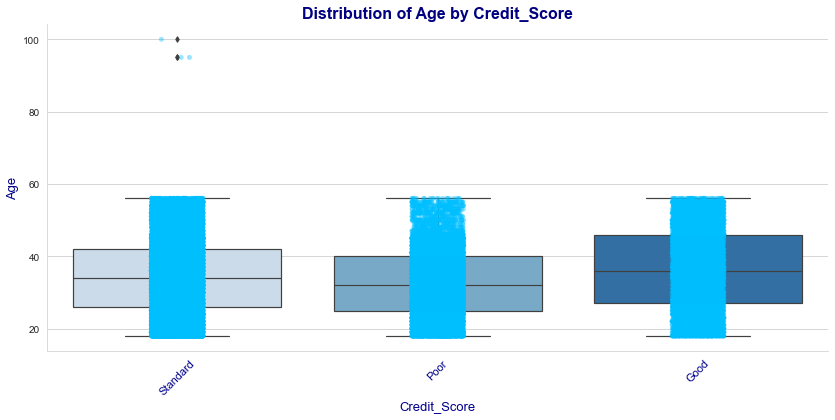

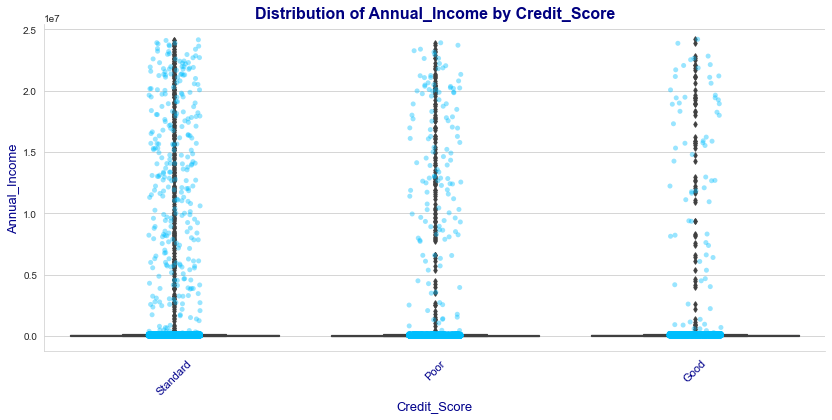

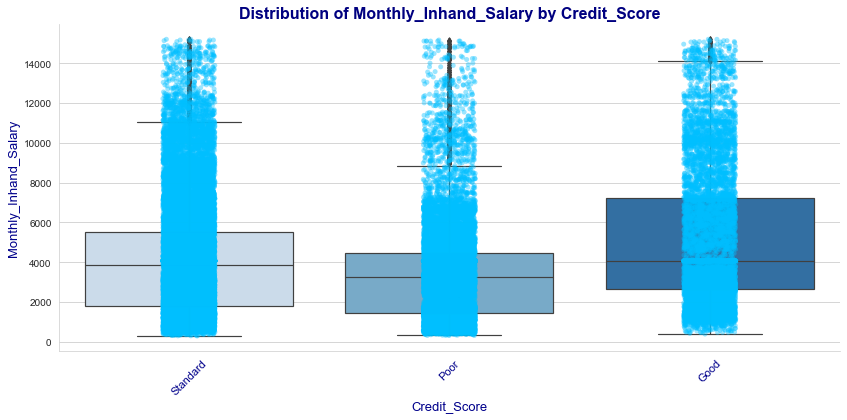

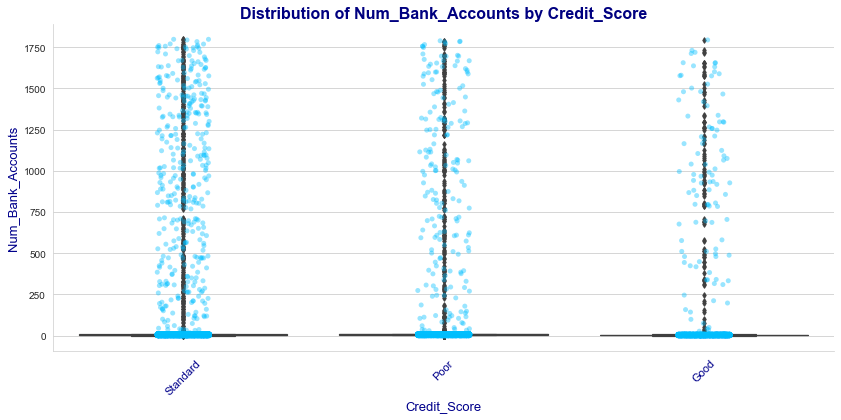

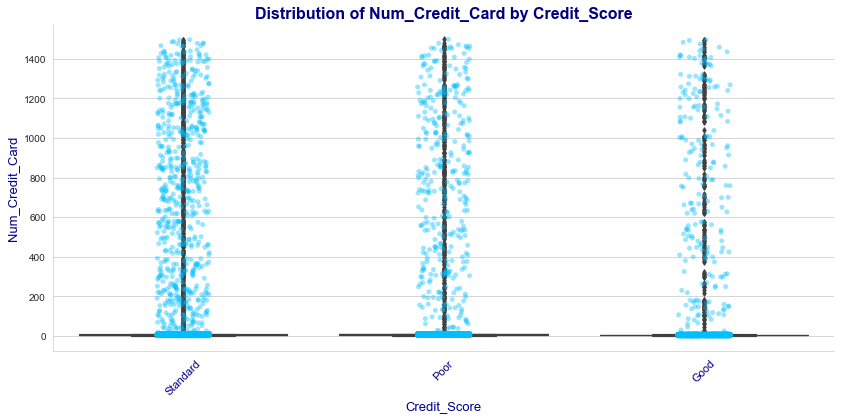

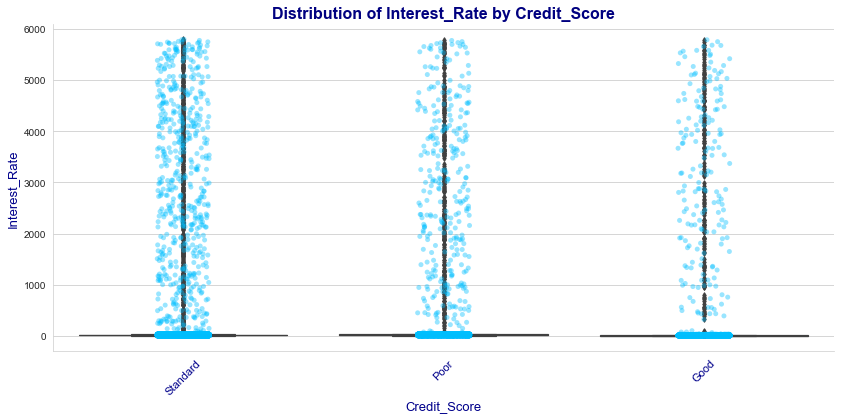

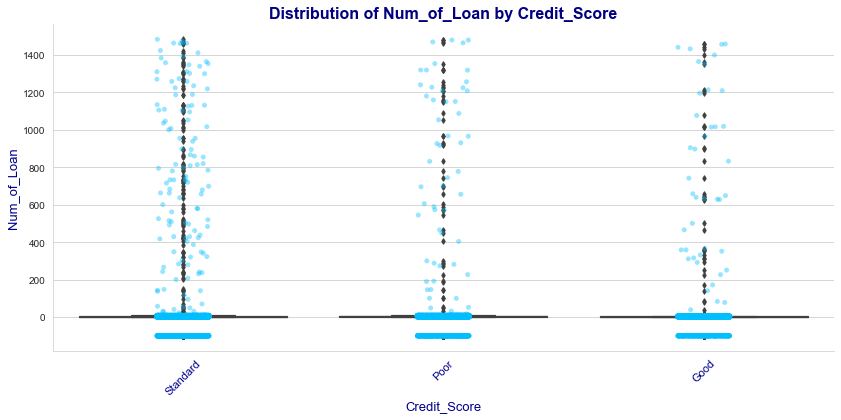

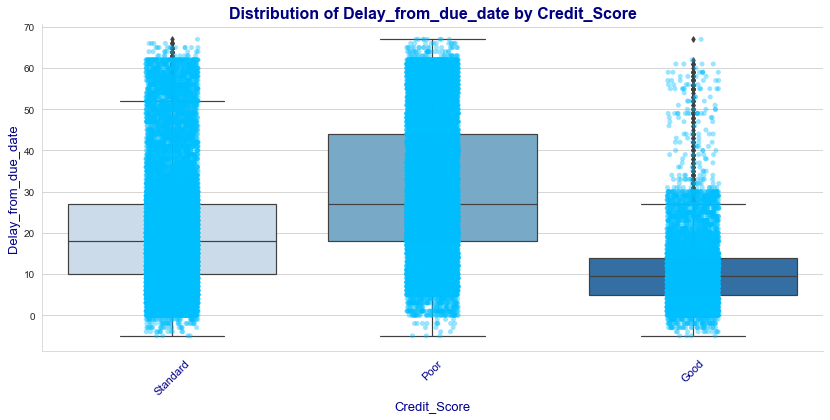

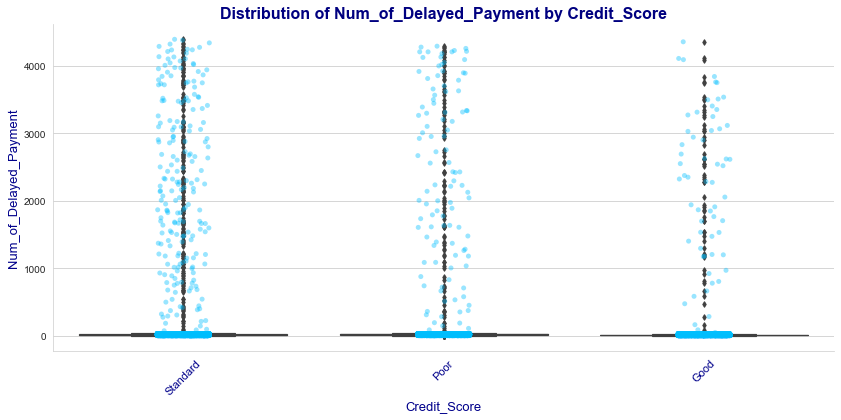

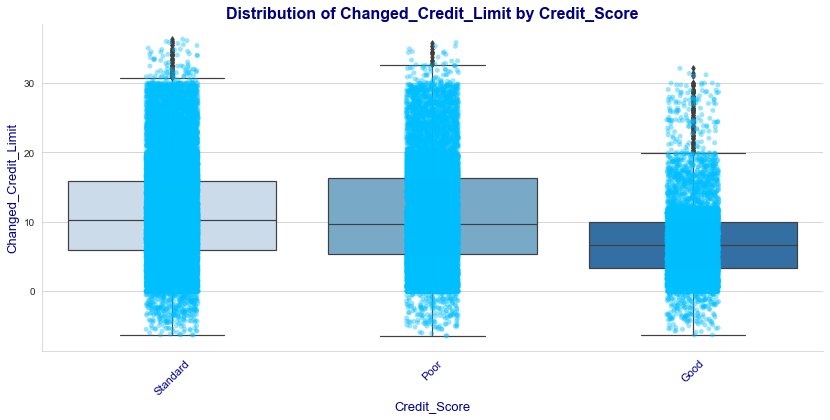

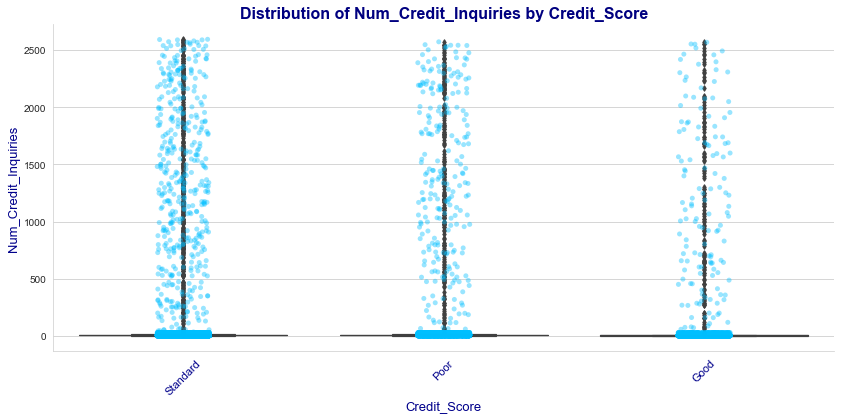

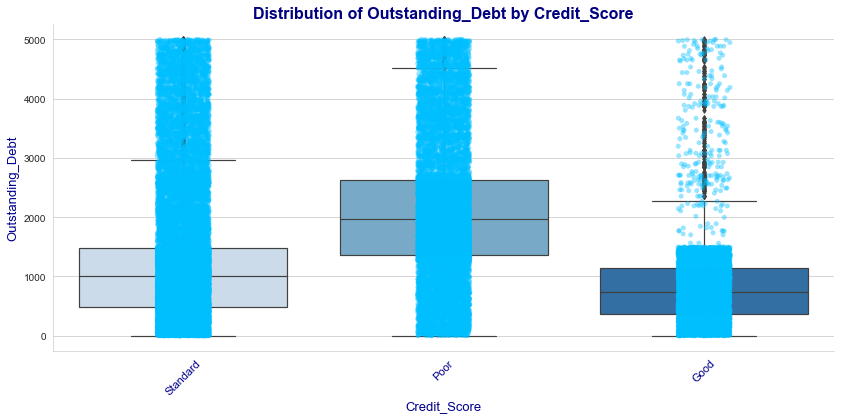

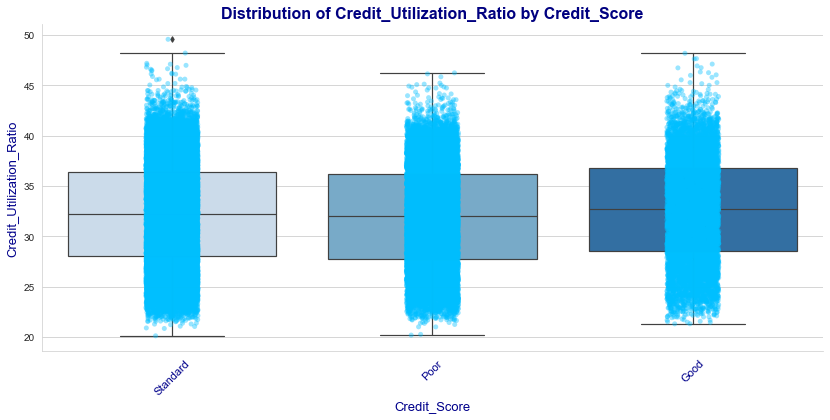

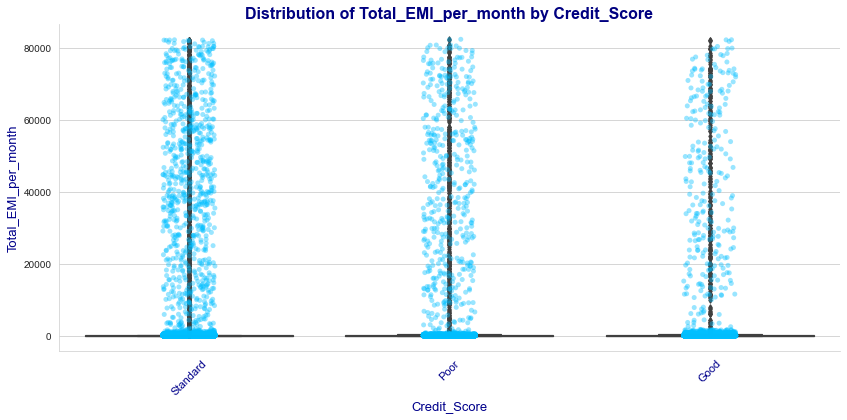

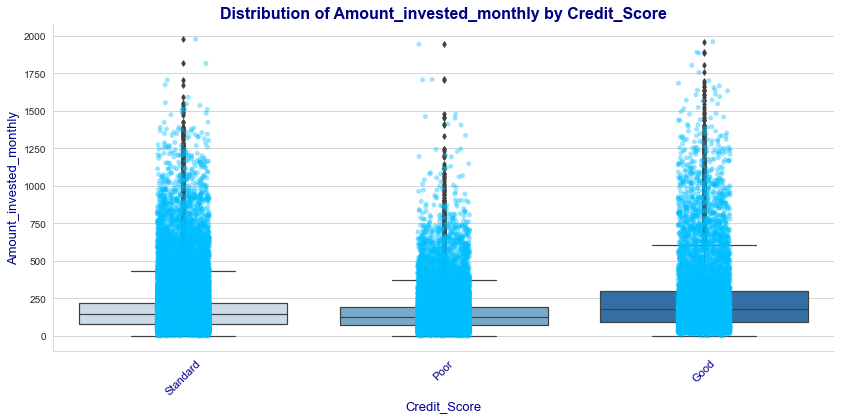

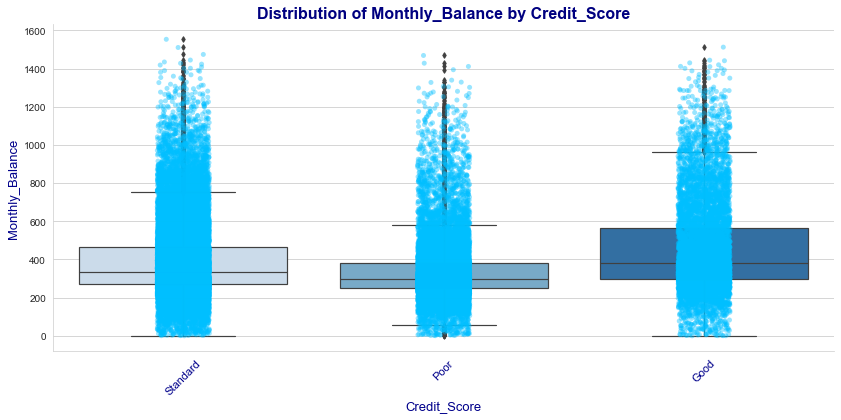

In [107]:
# Set a skyblue theme
sns.set_style("whitegrid")
sns.set_palette("Blues")   # use blue shades
plt.rcParams["axes.edgecolor"] = "lightgray"
plt.rcParams["axes.linewidth"] = 0.8

for col in numeric_columns:
    plt.figure(figsize=(14, 6))
    
    # Skyblue boxplot
    sns.boxplot(
        x='Credit_Score', 
        y=col, 
        data=ls_df_droped_new, 
        palette="Blues", 
        fliersize=4,   # size of outlier dots
        linewidth=1.2  # border width
    )
    
    # Overlay swarmplot for better visibility of data points
    sns.stripplot(
        x='Credit_Score', 
        y=col, 
        data=ls_df_droped_new, 
        color="deepskyblue", 
        alpha=0.4, 
        jitter=True
    )
    
    # Titles & labels
    plt.title(f"Distribution of {col} by Credit_Score", fontsize=16, fontweight='bold', color="navy")
    plt.xticks(rotation=45, fontsize=11, color="darkblue")
    plt.xlabel('Credit_Score', fontsize=13, color="darkblue")
    plt.ylabel(col, fontsize=13, color="darkblue")
    
    # Remove top & right spines for clean look
    sns.despine()
    
    plt.show()


If you look at above chart you will observe that we have some outlier in Age column which can be ingored as it is less in numbers and in almost all of the columns value  greatly  differ from the mean. Which mean that we have a lot variance in our data. 

<Figure size 1008x432 with 0 Axes>

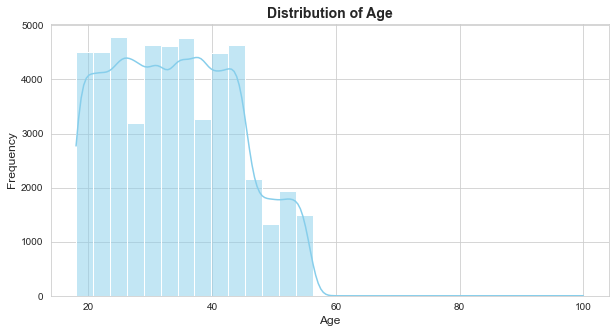

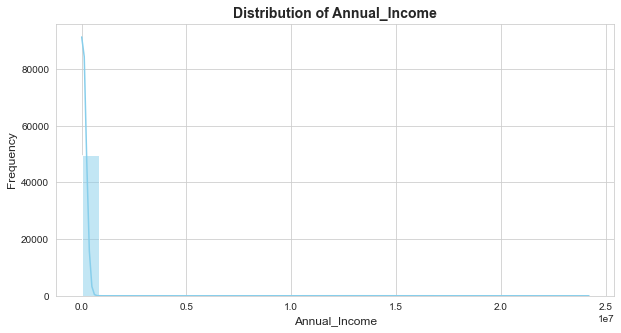

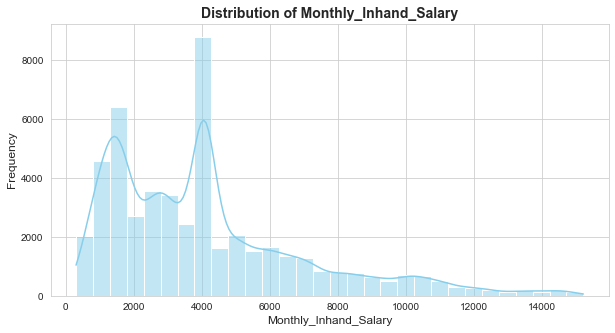

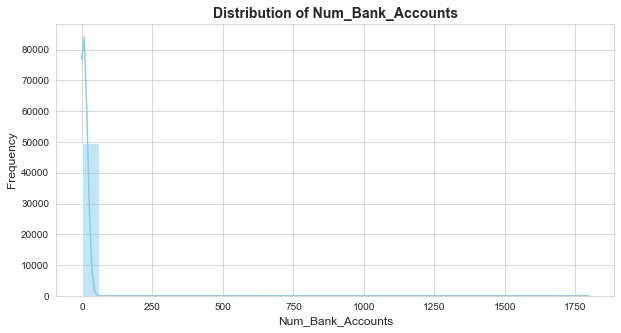

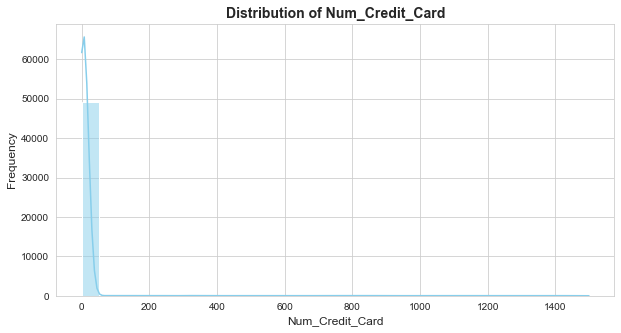

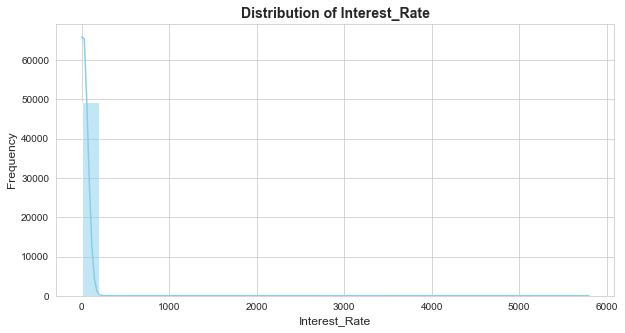

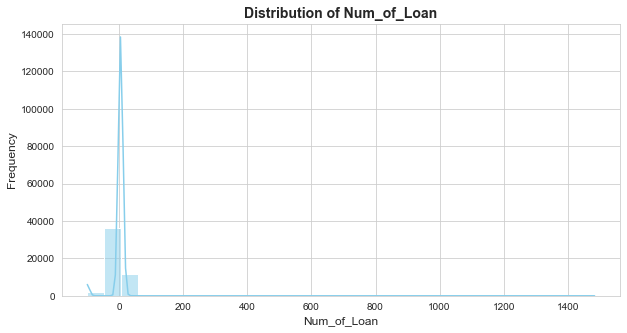

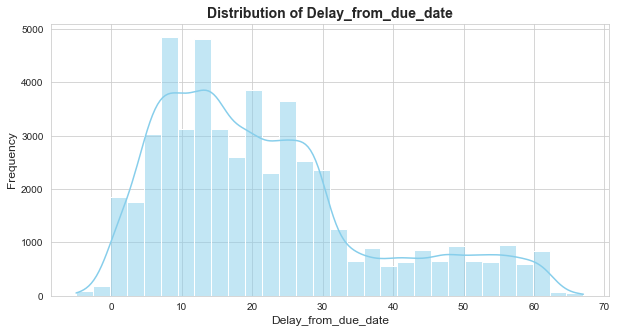

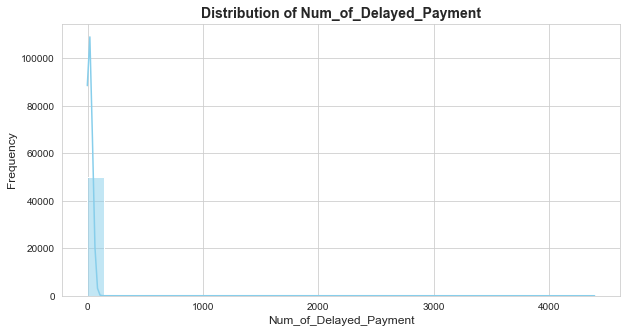

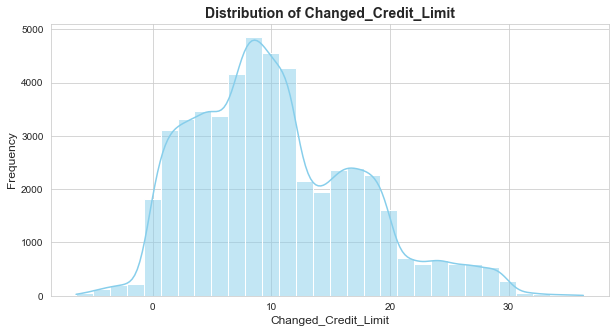

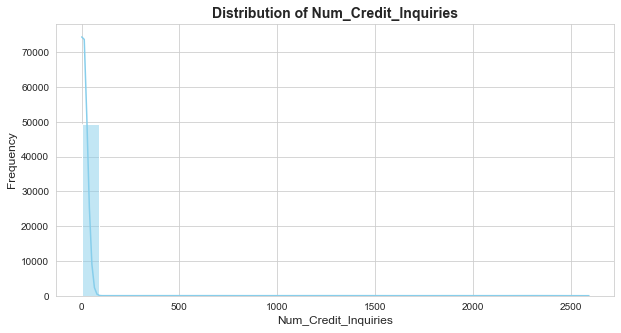

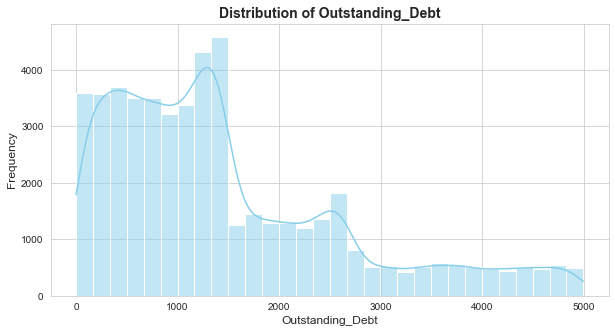

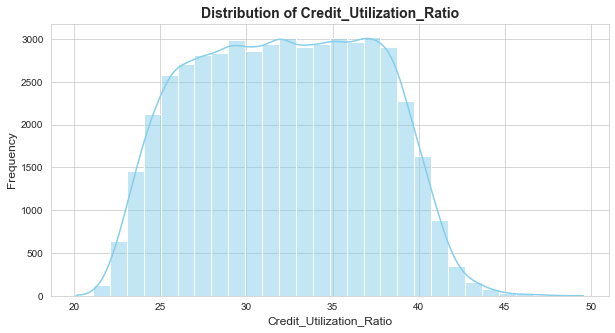

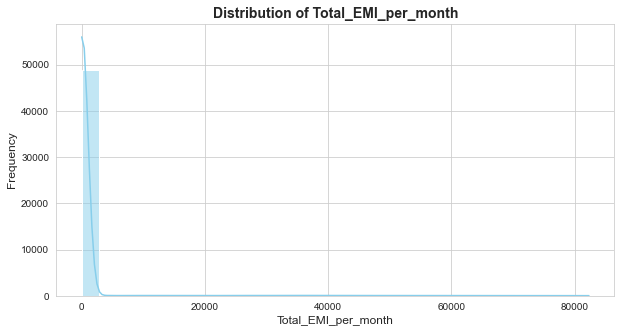

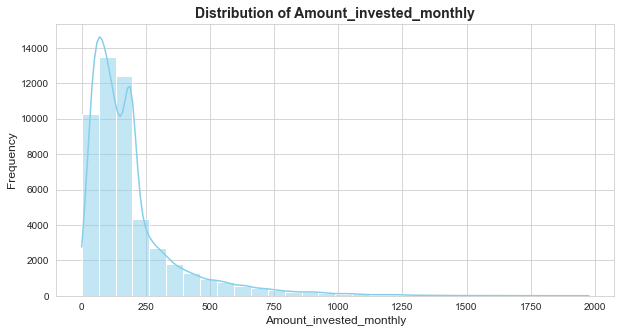

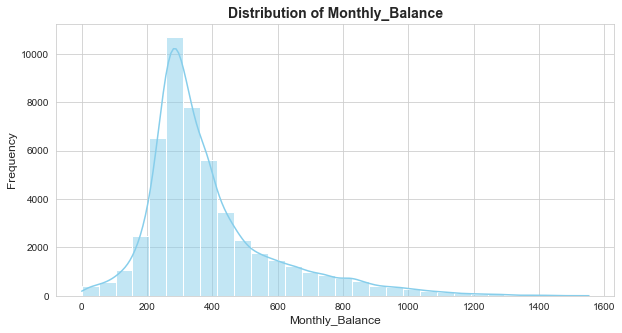

In [104]:
sns.set_style("whitegrid")

# set figure size for better readability
plt.figure(figsize=(14, 6))

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(ls_df_droped_new[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

Are there invalid or unrealistic values in **Annual_Income**, **Monthly_Inhand_Salary**, or **Outstanding_Debt**?  

In above chart we can see that all value are in realastic range but most have right skew data for example both variables, Monthly Balance and Amount Invested Monthly, exhibit a very similar and highly pronounced right-skewed distribution. This reveals a common pattern in customer financial behavior.

Overwhelming Majority are Small Values:

- For both metrics, the vast majority of customers have very low values, with frequencies peaking near $0 and then rapidly declining.

- This suggests that most customers in the dataset have either:

- A very low monthly balance (remaining cash at the end of the month).

- A very small amount (or nothing) that they invest monthly.

Long Right Tail of High-Value Outliers:

- A very small fraction of customers have unusually high values for both their balance and investments, extending out to $2000.

- These customers are the outliers—they are either high earners, aggressive savers/investors, or both.

#### Is **Monthly_Balance** consistent with `(Income – Expenses – EMI)`? 

C:\Users\ramas\AppData\Local\Temp\ipykernel_33224\142265110.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(scatter)


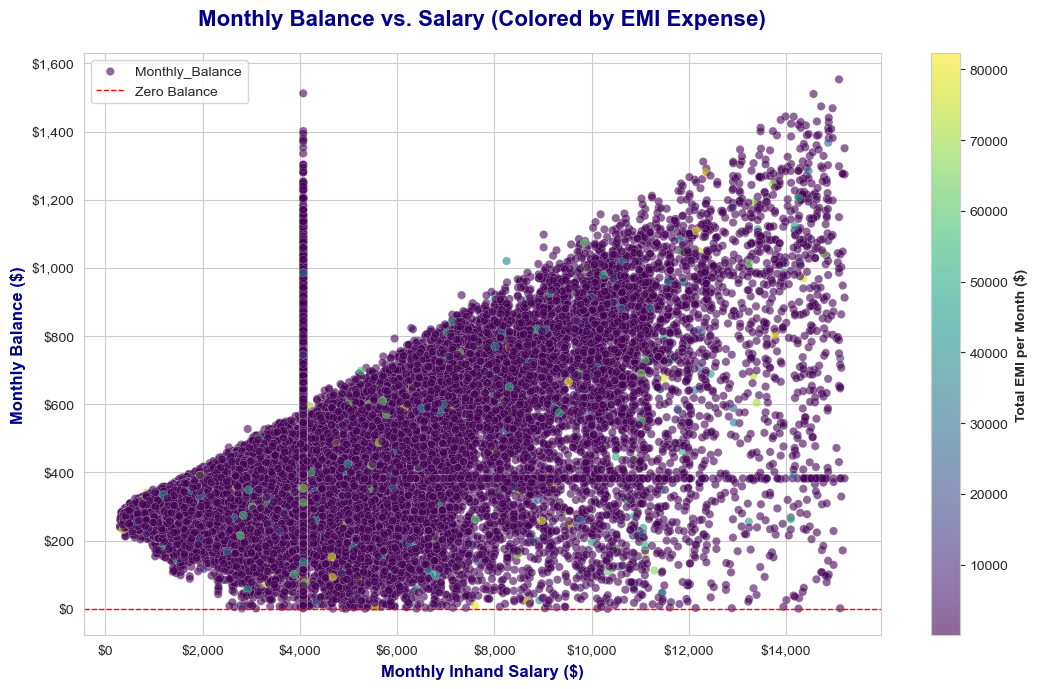

In [37]:
plt.figure(figsize=(11, 7))

# Create the scatter plot, coloring points by their EMI amount
scatter = plt.scatter(
    data=ls_df_droped_new,
    x='Monthly_Inhand_Salary',
    y='Monthly_Balance',
    c='Total_EMI_per_month',  # This adds color based on EMI value
    cmap='viridis',  # Color scale
    alpha=0.6,
    edgecolors='w',
    linewidth=0.2
)

# Add a colorbar to interpret the EMI values
cbar = plt.colorbar(scatter)
cbar.set_label('Total EMI per Month ($)', fontweight='bold')

# Add a reference line for "Zero Balance"
plt.axhline(y=0, color='r', linestyle='--', linewidth=1, label='Zero Balance')
# Labels and title
plt.title('Monthly Balance vs. Salary (Colored by EMI Expense)', 
          fontsize=16, fontweight='bold', pad=20, color='darkblue')
plt.xlabel('Monthly Inhand Salary ($)', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Monthly Balance ($)', fontsize=12, fontweight='bold', color='darkblue')

# Format axes as currency
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.legend()
plt.tight_layout()
plt.show()

1. Illogical High Balances with High EMI: The most glaring issue is the cluster of points with very high Monthly Balance (~$1,600) AND very high EMI (up to $80,000). This is financially impossible. A customer's monthly balance (cash leftover) cannot be positive and high if their EMI obligations alone are 16 times a typical high salary shown on the X-axis. This would imply they have an astronomical income not reflected in the Monthly_Inhand_Salary field.

2. Negative EMI?: The colorbar suggests the presence of negative EMI values (around -10,000). This is a data quality issue, as EMI (Equated Monthly Installment) is always a positive expense. Negative values are nonsensical.

3. No Clear Pattern: There is no clear visual pattern where points with lower EMI (cooler colors) are higher on the Y-axis for a given salary. The high-EMI, high-Balance anomaly completely dominates and distorts the chart.

4. The "Zero Balance" Line is Mostly Ignored: While many points are near or below the red dashed line (indicating little to no monthly cash surplus), the presence of the high-balance outliers violates the core logic of Income - Expenses = Balance.

In [120]:
sum(((ls_df_droped_new['Monthly_Inhand_Salary'] - (ls_df_droped_new['Amount_invested_monthly'] + ls_df_droped_new['Total_EMI_per_month'])== ls_df_droped_new['Monthly_Balance'])))

0

As we don't have monthly expense details we can not verify that Income – Expenses – EMI

In [121]:
sum(((ls_df_droped_new['Monthly_Inhand_Salary'] - (ls_df_droped_new['Amount_invested_monthly'] + ls_df_droped_new['Total_EMI_per_month'])> ls_df_droped_new['Monthly_Balance'])))

48769

##### Do categorical columns (**Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount, Type_of_Loan**) have unexpected categories?  


--- Unique values for 'Credit_Mix': ---
Standard    22867
Good        14732
Bad         12734
Name: Credit_Mix, dtype: int64
Number of unique categories: 3

--- Unique values for 'Payment_Behaviour': ---
Low_spent_Small_value_payments      14032
High_spent_Medium_value_payments     9568
Low_spent_Medium_value_payments      7489
High_spent_Large_value_payments      7441
High_spent_Small_value_payments      6115
Low_spent_Large_value_payments       5688
Name: Payment_Behaviour, dtype: int64
Number of unique categories: 6

--- Unique values for 'Payment_of_Min_Amount': ---
Yes    26900
No     17343
NM      6090
Name: Payment_of_Min_Amount, dtype: int64
Number of unique categories: 3

--- Unique values for 'Type_of_Loan': ---
Not Specified                                                                                                               841
Student Loan                                                                                                                787
Credit-Buil

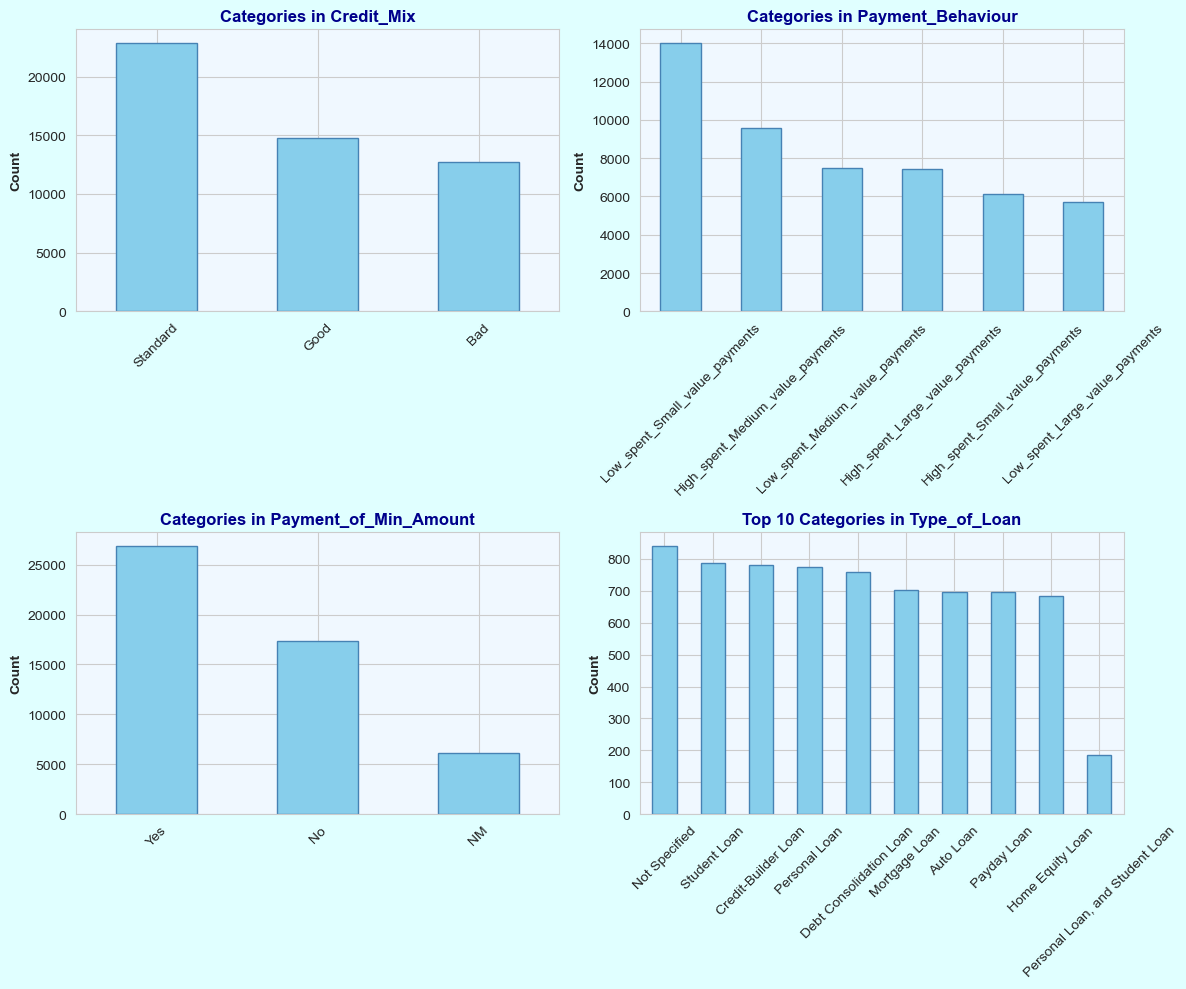

In [39]:
categorical_columns = [
    'Credit_Mix',
    'Payment_Behaviour',
    'Payment_of_Min_Amount',
    'Type_of_Loan'
]

# Create a figure for the count plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2x2 array for easy iteration

# Set a skyblue theme for the plots
skyblue_color = 'skyblue'
plt.rcParams['axes.facecolor'] = 'aliceblue'
fig.patch.set_facecolor('lightcyan')

for i, col in enumerate(categorical_columns):
    # Get value counts for the column
    value_counts = ls_df_droped_new[col].value_counts()
    
    # Print the unique values and their counts
    print(f"\n--- Unique values for '{col}': ---")
    print(value_counts)
    print(f"Number of unique categories: {len(value_counts)}")
    
    # Plot the value counts (show top 10 if there are many categories)
    if len(value_counts) > 10:
        value_counts.head(10).plot(kind='bar', ax=axes[i], color=skyblue_color, edgecolor='steelblue')
        axes[i].set_title(f'Top 10 Categories in {col}', fontweight='bold', color='darkblue')
    else:
        value_counts.plot(kind='bar', ax=axes[i], color=skyblue_color, edgecolor='steelblue')
        axes[i].set_title(f'Categories in {col}', fontweight='bold', color='darkblue')
    
    axes[i].set_ylabel('Count', fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

We did not find any unexpected category in **Credit_Mix, Payment_Behaviour, Payment_of_Min_Amount, Type_of_Loan** .

### 🔹 Univariate Analysis (Single Feature Insights)
- What is the distribution of **Credit_Score classes** (balanced vs. imbalanced)?  
- What is the distribution of **Age** in the dataset? Do younger vs older applicants differ in credit risk?  
- How is **Annual_Income** distributed? Is it skewed?  
- What is the most common **Occupation** type among applicants?  
- What are the most frequent loan types in **Type_of_Loan**?  
- How does **Credit_History_Age** vary across customers?  


#### What is the distribution of **Credit_Score classes** (balanced vs. imbalanced)?  

Class Distribution (Counts):
 Standard    26554
Poor        15185
Good         8594
Name: Credit_Score, dtype: int64

Class Distribution (Percentage):
 Standard    52.76
Poor        30.17
Good        17.07
Name: Credit_Score, dtype: float64


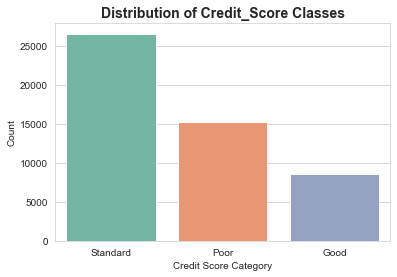

In [124]:
score_counts = ls_df_droped_new['Credit_Score'].value_counts()
score_percent = ls_df_droped_new['Credit_Score'].value_counts(normalize=True) * 100

print("Class Distribution (Counts):\n", score_counts)
print("\nClass Distribution (Percentage):\n", score_percent.round(2))

# Visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_Score', data=ls_df_droped_new, palette="Set2")
plt.title("Distribution of Credit_Score Classes", fontsize=14, fontweight='bold')
plt.xlabel("Credit Score Category")
plt.ylabel("Count")
plt.show()

Below are the observation which can be deduced from the chart
The dataset is imbalanced.

- Standard class is the majority (around 26k records).

- Poor class is the second largest (around 15k records).

- Good class is the minority (around 8k records).

This imbalance means that machine learning models trained on this dataset might be biased toward the "Standard" class and perform worse on predicting "Good" and "Poor" scores unless class imbalance techniques (e.g., SMOTE, class weights, undersampling) are applied.

#### What is the distribution of **Age** in the dataset? Do younger vs older applicants differ in credit risk?  

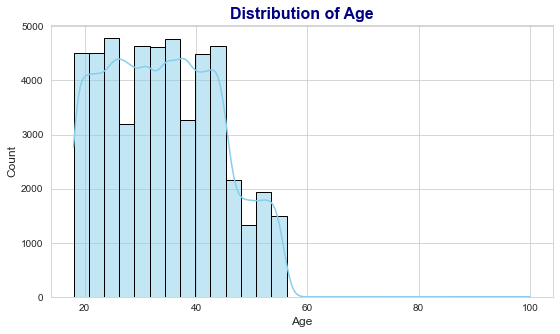

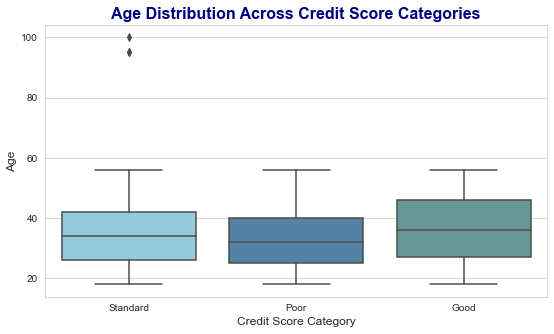

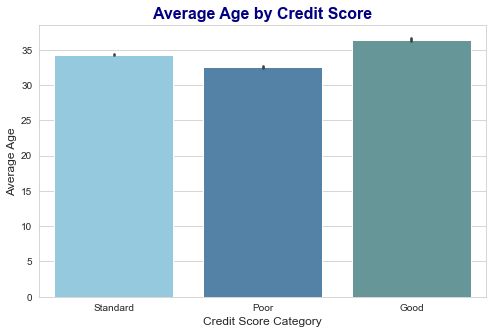

In [125]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"   # skyblue hex color

# 1. Distribution of Age
plt.figure(figsize=(9,5))
sns.histplot(ls_df_droped_new['Age'], bins=30, kde=True, color=skyblue, edgecolor="black")
plt.title("Distribution of Age", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2. Age distribution by Credit Score
plt.figure(figsize=(9,5))
sns.boxplot(x="Credit_Score", y="Age", data=ls_df_droped_new, palette=[skyblue, "#4682B4", "#5F9EA0"])
plt.title("Age Distribution Across Credit Score Categories", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit Score Category", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

# 3. Average Age by Credit Score
plt.figure(figsize=(8,5))
sns.barplot(x="Credit_Score", y="Age", data=ls_df_droped_new, 
            estimator=lambda x: sum(x)/len(x),
            palette=[skyblue, "#4682B4", "#5F9EA0"])
plt.title("Average Age by Credit Score", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit Score Category", fontsize=12)
plt.ylabel("Average Age", fontsize=12)
plt.show()


Observations on Age Distribution

General Age Distribution (Top Plot)

- Most applicants are between 20 and 50 years old, with a peak around 30–40 years.

- Very few applicants are above 60, indicating younger individuals dominate the dataset.

- Outliers exist (ages close to 100), which may need cleaning/validation.

Age Across Credit Score Categories (Bottom Plot)

- Median ages across Poor, Standard, and Good credit scores are fairly similar (around 30–40 years).

- Applicants with a Good credit score show slightly higher age distribution compared to Poor and Standard.

Younger applicants (20s) are present across all categories, but older applicants (>50) are more concentrated in Good credit score, suggesting financial maturity improves credit behavior.

#### How is **Annual_Income** distributed? Is it skewed?  


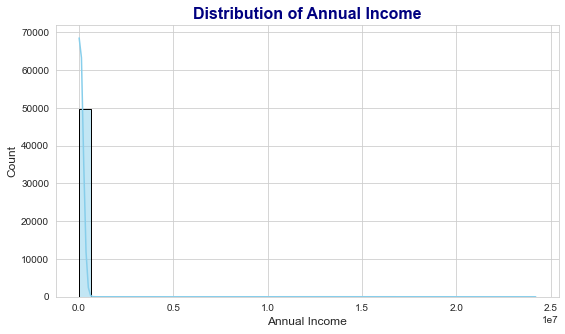

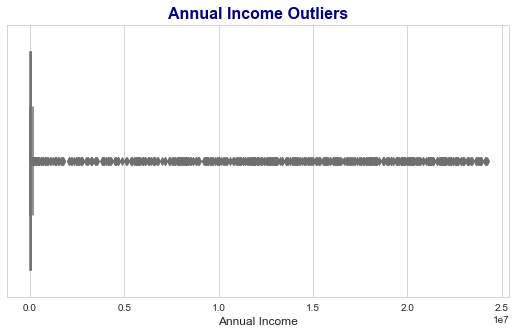

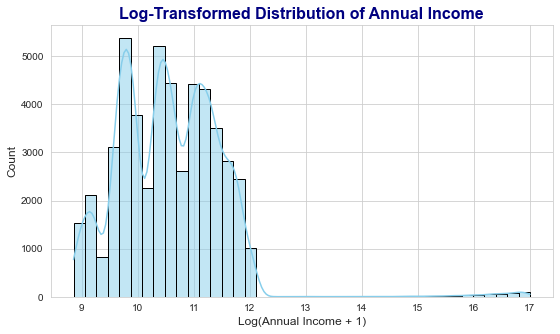

In [126]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

# 1. Histogram with KDE
plt.figure(figsize=(9,5))
sns.histplot(ls_df_droped_new['Annual_Income'], bins=40, kde=True, color=skyblue, edgecolor="black")
plt.title("Distribution of Annual Income", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2. Boxplot to detect outliers
plt.figure(figsize=(9,5))
sns.boxplot(x=ls_df_droped_new['Annual_Income'], color=skyblue)
plt.title("Annual Income Outliers", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Annual Income", fontsize=12)
plt.show()

# 3. Log-transformed distribution (for skewness check)
plt.figure(figsize=(9,5))
sns.histplot(np.log1p(ls_df_droped_new['Annual_Income']), bins=40, kde=True, color=skyblue, edgecolor="black")
plt.title("Log-Transformed Distribution of Annual Income", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Log(Annual Income + 1)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

1. Raw Distribution (Histogram & KDE):

- The raw Annual_Income distribution is extremely right-skewed.

- Most applicants fall in the lower income range, while a few extreme values stretch into very high income levels.

- This creates a long tail, making the distribution highly imbalanced.

2. Log-Transformed Distribution:

- After applying a log transformation, the distribution becomes more normal-like and much easier to interpret.

- This confirms that raw income values had heavy skewness due to large outliers.

3. Outliers (Boxplot):

- Boxplot shows many extreme high-income outliers (up to ~2.5 crore / 25 million).

- These are far from the main cluster of data and could distort model training.

#### What is the most common **Occupation** type among applicants?  

Occupation Counts:
 Lawyer           3622
Mechanic         3475
Architect        3460
Accountant       3435
Scientist        3424
Entrepreneur     3413
Engineer         3387
Doctor           3359
Teacher          3348
Media_Manager    3326
Developer        3323
Journalist       3268
Musician         3192
Manager          3152
Writer           3149
Name: Occupation, dtype: int64

Most common occupation: Lawyer (3622 applicants)


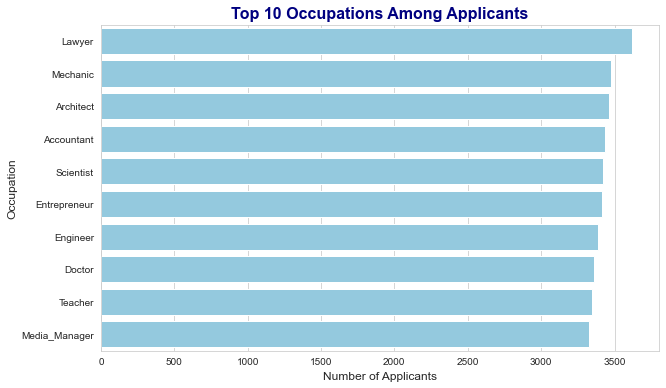

In [133]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

# 1. Count values
occupation_counts = ls_df_droped_new['Occupation'].value_counts()
print("Occupation Counts:\n", occupation_counts)

# 2. Most common occupation
most_common = occupation_counts.idxmax()
print(f"\nMost common occupation: {most_common} ({occupation_counts.max()} applicants)")

# 3. Visualization (Top 10 occupations)
top_n = 10
plt.figure(figsize=(10,6))
sns.barplot(
    x=occupation_counts[:top_n].values,
    y=occupation_counts[:top_n].index,
    palette=[skyblue]*top_n
)
plt.title(f"Top {top_n} Occupations Among Applicants", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Number of Applicants", fontsize=12)
plt.ylabel("Occupation", fontsize=12)
plt.show()

As per the above chart Lawyer, Mechanic, Architect,Accountant, Scientist, Entrepreneur,Engineer, Doctor,Teache and  Media_Manager are top 10 profession found in the data.


#### What are the most frequent loan types in **Type_of_Loan**?  

Loan Type Counts:
 Not Specified                                                                                                               841
Student Loan                                                                                                                787
Credit-Builder Loan                                                                                                         782
Personal Loan                                                                                                               773
Debt Consolidation Loan                                                                                                     758
                                                                                                                           ... 
Payday Loan, Credit-Builder Loan, Debt Consolidation Loan, Auto Loan, Personal Loan, and Personal Loan                        1
Payday Loan, Student Loan, Auto Loan, and Debt Consolidation Loan                    

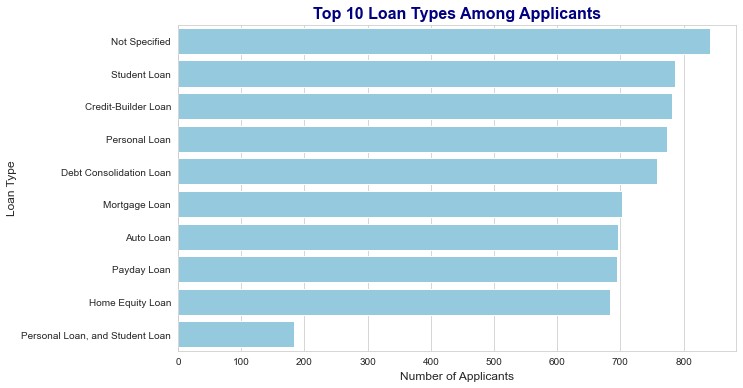

In [135]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

# 1. Count values
loan_counts = ls_df_droped_new['Type_of_Loan'].value_counts()
print("Loan Type Counts:\n", loan_counts)

# 2. Most frequent loan type
most_frequent = loan_counts.idxmax()
print(f"\nMost frequent loan type: {most_frequent} ({loan_counts.max()} applicants)")

# 3. Visualization (Top 10 loan types)
top_n = 10
plt.figure(figsize=(10,6))
sns.barplot(
    x=loan_counts[:top_n].values,
    y=loan_counts[:top_n].index,
    palette=[skyblue]*top_n
)
plt.title(f"Top {top_n} Loan Types Among Applicants", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Number of Applicants", fontsize=12)
plt.ylabel("Loan Type", fontsize=12)
plt.show()


- Among the specified categories, the top loan types are:

  Student Loan

  Credit-Builder Loan

  Personal Loan

  Debt Consolidation Loan

- Other notable loan types include Mortgage Loan, Auto Loan, Payday Loan, and Home Equity Loan, each with ~650–700 applicants.

- A smaller proportion of applicants report multiple loans together (e.g., “Personal Loan and Student Loan”), showing overlap between categories.

- Student Loans, Credit-Builder Loans, and Personal Loans dominate among clearly defined categories.

- This information can help in understanding credit behavior patterns across loan categories (e.g., student loans may correlate with younger applicants, while mortgage loans with older applicants).


#### How does **Credit_History_Age** vary across customers? 

In [38]:
import pandas as pd
import numpy as np

def convert_to_months(x):
    if pd.isnull(x):
        return np.nan
    try:
        years = int(x.split("Years")[0].strip())
        months = int(x.split("and")[1].replace("Months","").strip())
        total_months = years * 12 + months
        return total_months
    except:
        return np.nan

ls_df_droped_new['Credit_History_Months'] = ls_df_droped_new['Credit_History_Age'].apply(convert_to_months)


C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\2801887934.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped_new['Credit_History_Months'] = ls_df_droped_new['Credit_History_Age'].apply(convert_to_months)


In [153]:
ls_df_droped_new['Credit_History_Months']

1         247
5         268
7         288
9          80
10        260
         ... 
149985    210
149986    386
149987    288
149991    103
149993    161
Name: Credit_History_Months, Length: 50333, dtype: int64

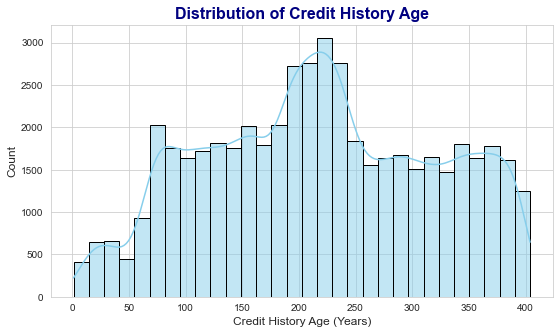

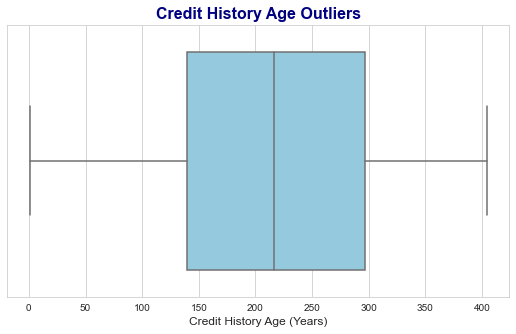

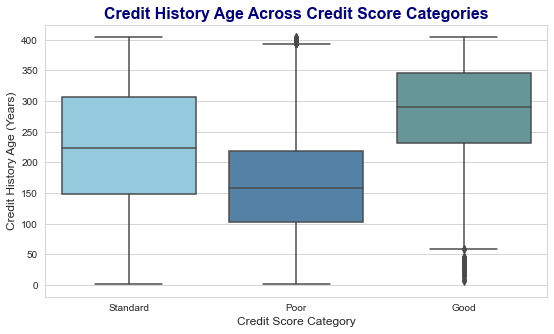

In [ ]:
sns.set_style("whitegrid")
skyblue = "#87CEEB"

age_wise = ls_df_droped_new.groupby('Credit_History_Age').agg(count=('Credit_History_Age', 'count')).sort_values('count', ascending=False).reset_index()


# 1. Distribution histogram with KDE
plt.figure(figsize=(9,5))
sns.histplot(ls_df_droped_new['Credit_History_Months'], bins=30, kde=True, color=skyblue, edgecolor="black")
plt.title("Distribution of Credit History Age", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit History Age (Month)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# 2. Boxplot to detect outliers
plt.figure(figsize=(9,5))
sns.boxplot(x=ls_df_droped_new['Credit_History_Months'], color=skyblue)
plt.title("Credit History Age Outliers", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit History Age (Month)", fontsize=12)
plt.show()

# 3. Optionally, compare with Credit_Score using boxplot
plt.figure(figsize=(9,5))
sns.boxplot(x='Credit_Score', y='Credit_History_Months', data=ls_df_droped_new, palette=[skyblue, "#4682B4", "#5F9EA0"])
plt.title("Credit History Age Across Credit Score Categories", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Credit Score Category", fontsize=12)
plt.ylabel("Credit History Age (Month)", fontsize=12)
plt.show()

Credit History Age Across Credit Score Categories

This chart shows a clear and significant relationship: customers with better credit scores have, on average, a longer credit history.

- "Good" Credit Score Category: These customers have the longest average credit history, as shown by the tallest bar. This makes logical sense, as a long, well-managed credit history is a primary factor in building a high score.

- "Standard" Credit Score Category: These customers have a moderately long credit history, shorter than the "Good" group but longer than the "Poor" group.

- "Poor" Credit Score Category: These customers have the shortest average credit history. This could be because they are new borrowers who haven't had time to build a history, or it could indicate that past accounts have been closed due to default, effectively shortening the average age of their remaining accounts.

- Conclusion: There is a strong positive correlation between Credit_History_Age and creditworthiness. A longer credit history is a hallmark of a good credit score.

In summary, the variation in Credit_History_Age across customers is characterized by:

- Strong Correlation with Credit Score: It is a key differentiating factor between credit score categories. Better scores = longer history.

- Concentrated Distribution: For most customers, the credit history age is less than 17 years.

- Significant Right-Skew: The distribution is not symmetrical. It has a long "tail" to the right, meaning a small number of customers have values far above the norm (extreme outliers with 30+ years of history).

- High Variability: The range is enormous, from new borrowers (likely 0 years) all the way up to ultra-experienced borrowers (33+ years). This means the value can differ dramatically from one customer to the next.

### 🔹 Bivariate & Relationship Questions
- Does higher **Annual_Income** correlate with better `Credit_Score`?  
- How does **Monthly_Inhand_Salary** affect `Outstanding_Debt`?  
- Is there a relationship between **Num_Credit_Card** and `Credit_Utilization_Ratio`?  
- Does **Num_of_Delayed_Payment** strongly correlate with poor credit score?  
- How do **Interest_Rate** and **Total_EMI_per_month** affect `Monthly_Balance`?  
- Is there a difference in credit score distribution across different **Credit_Mix** types?  
- Does **Payment_Behaviour** indicate future default risk?  

#### Does higher **Annual_Income** correlate with better `Credit_Score`? 

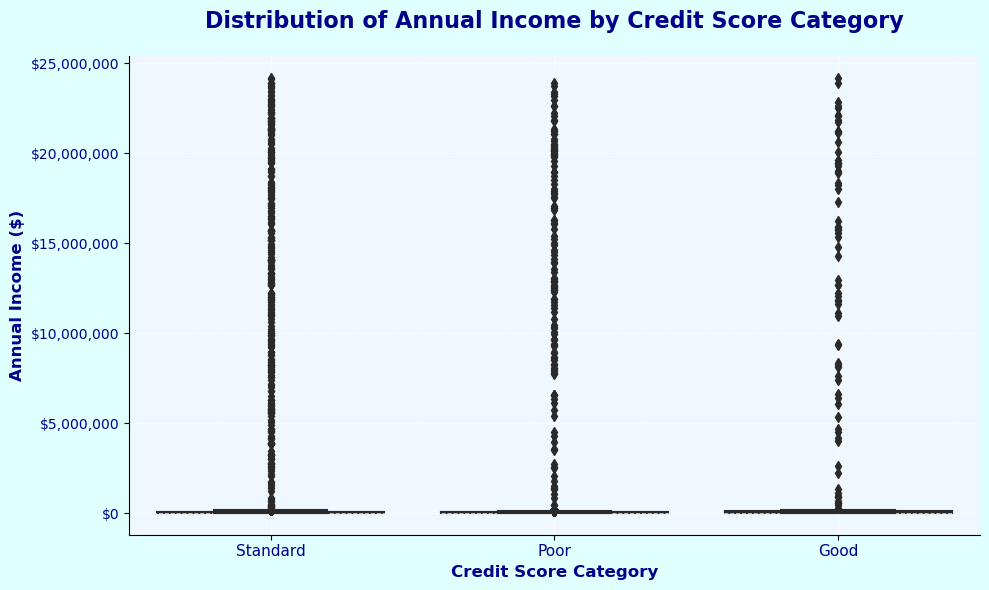

In [ ]:

plt.style.use('default') 
sns.set_palette(["skyblue", "steelblue", "darkblue"])


fig, ax = plt.subplots(figsize=(10, 6))


sns.boxplot(data=ls_df_droped_new, x='Credit_Score', y='Annual_Income', 
            ax=ax, linewidth=1.5)


ax.set_facecolor('aliceblue')  
fig.patch.set_facecolor('lightcyan')  
ax.grid(True, linestyle='--', alpha=0.7, color='white')


ax.set_title('Distribution of Annual Income by Credit Score Category', 
             fontsize=16, fontweight='bold', color='darkblue', pad=20)
ax.set_xlabel('Credit Score Category', fontsize=12, fontweight='bold', color='darkblue')
ax.set_ylabel('Annual Income ($)', fontsize=12, fontweight='bold', color='darkblue')

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))


ax.tick_params(axis='x', labelsize=11, labelcolor='darkblue')
ax.tick_params(axis='y', labelsize=10, labelcolor='darkblue')

sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

Based on the above chart we can come up with following conclusion:

- Extreme Outlier Dominates: The scale of the y-axis is massively stretched to accommodate one (or a few) extreme outliers in the "Standard" credit score category, with an annual income exceeding $20 million. This distorts the entire chart and makes it impossible to see the pattern for the vast majority of data points.

- Medians are Obscured: Because of the outlier, the boxes for each credit score category (which would normally show the median and interquartile range where most data lies) are compressed at the very bottom of the chart. This means we cannot compare the typical income levels for each group.
- No Visible Trend: With the data view dominated by a single outlier, no positive trend from "Poor" to "Good" can be observed. The income distributions for all three categories appear to start from the same baseline (near $0).

This suggests that for the vast majority of customers in this dataset, income is not a primary differentiating factor for their credit score. Other factors like payment history (Num_of_Delayed_Payment), debt management (Outstanding_Debt, Credit_Utilization_Ratio), and credit history length (Credit_History_Age) are likely much stronger predictors.

#### How does **Monthly_Inhand_Salary** affect `Outstanding_Debt`?  

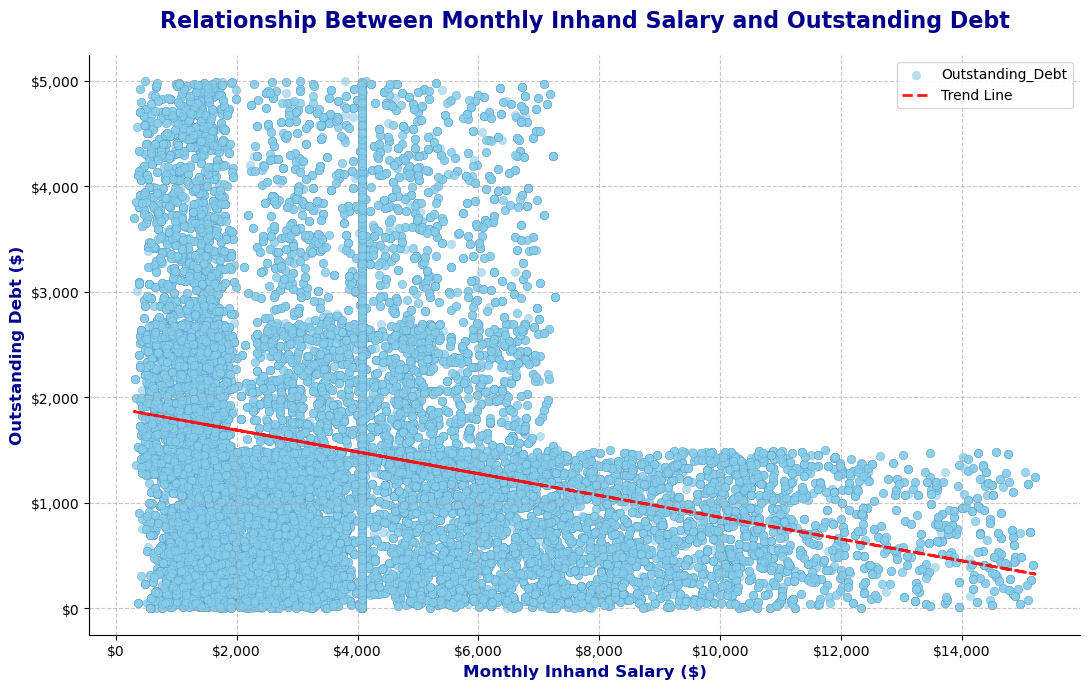

In [ ]:

plt.figure(figsize=(11, 7))

scatter = plt.scatter(data=ls_df_droped_new, 
                     x='Monthly_Inhand_Salary', 
                     y='Outstanding_Debt',
                     alpha=0.6,  
                     c='skyblue',
                     edgecolor='steelblue',
                     linewidth=0.2)


z = np.polyfit(ls_df_droped_new['Monthly_Inhand_Salary'].dropna(), ls_df_droped_new['Outstanding_Debt'].dropna(), 1) # 1st degree polynomial (a line)
p = np.poly1d(z)
plt.plot(ls_df_droped_new['Monthly_Inhand_Salary'], p(ls_df_droped_new['Monthly_Inhand_Salary']), "r--", alpha=0.9, linewidth=2, label='Trend Line')

plt.title('Relationship Between Monthly Inhand Salary and Outstanding Debt', 
          fontsize=16, fontweight='bold', pad=20, color='darkblue')
plt.xlabel('Monthly Inhand Salary ($)', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Outstanding Debt ($)', fontsize=12, fontweight='bold', color='darkblue')

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Key Evidence from the Chart:

- Extremely Wide Scatter: The data points form a massive, wide cloud with no discernible pattern. This means that for any given salary level (e.g., $5,000 per month), the outstanding debt among individuals varies wildly—from very low (near $0) to very high (over $4,000). This immense variability confirms that salary is a very poor predictor of debt.

- No Clear Pattern: You cannot draw a clear upward or downward pattern by looking at the cloud of points. Individuals with low salaries have just as much chance of having high debt as those with high salaries.

Implications and Interpretation:
- This leads to a powerful and counter-intuitive insight: A person's take-home pay is not a primary driver of how much debt they accumulate.

- High earners are not necessarily leveraging their income to take on more debt; many have low debt levels.

- Low earners are not automatically constrained to low debt; many have managed to accumulate significant debt relative to their income.

This suggests that financial behavior, lifestyle choices, and personal circumstances are far more significant factors in determining debt levels than income alone. Factors like:_

 - Spending habits (Payment_Behaviour)

 - Financial discipline (Num_of_Delayed_Payment, Payment_of_Min_Amount)

 - Life events (e.g., medical emergencies, large purchases)

 - Access to credit (Num_Credit_Card, Num_of_Loan)

 #### Is there a relationship between **Num_Credit_Card** and `Credit_Utilization_Ratio`? 

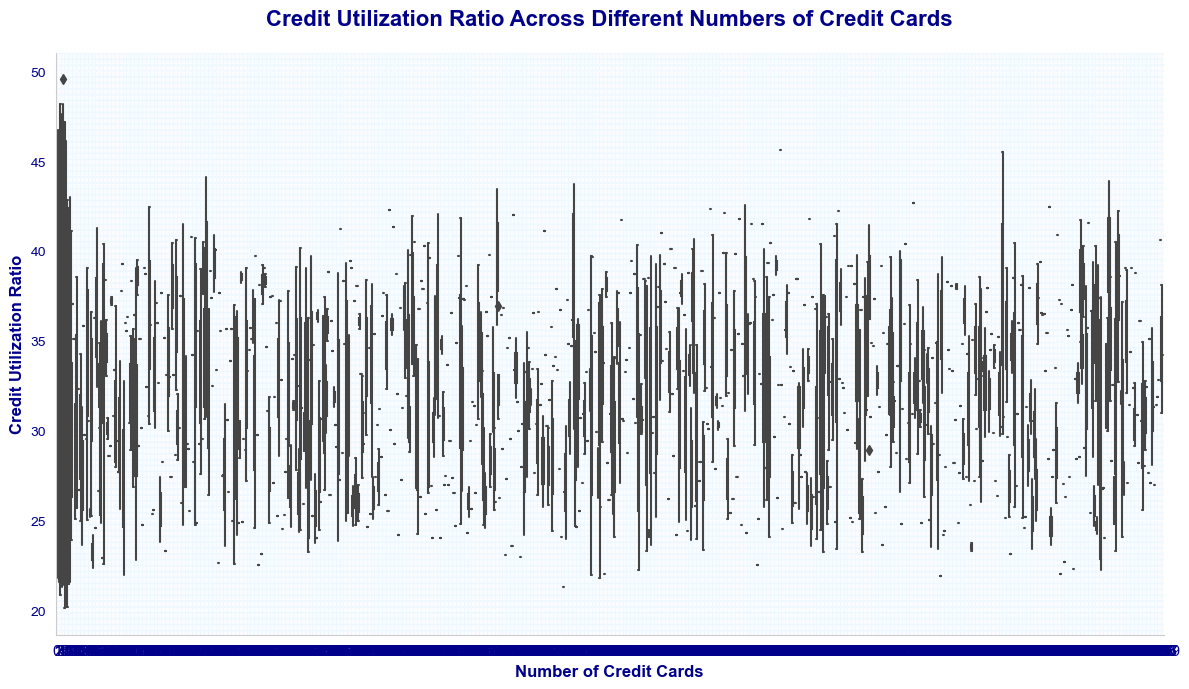

In [ ]:
plt.figure(figsize=(12, 7))

sns.boxplot(data=ls_df_droped_new, 
            x='Num_Credit_Card', 
            y='Credit_Utilization_Ratio',
            linewidth=1.5)


plt.gca().set_facecolor('aliceblue') 
plt.grid(True, linestyle='--', alpha=0.7, color='white')


plt.title('Credit Utilization Ratio Across Different Numbers of Credit Cards', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Number of Credit Cards', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Credit Utilization Ratio', fontsize=12, fontweight='bold', color='darkblue')

plt.tick_params(axis='x', labelsize=11, labelcolor='darkblue')
plt.tick_params(axis='y', labelsize=10, labelcolor='darkblue')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

No Consistent Trend:

- The median credit utilization ratio (the line inside each box) does not show a consistent upward or downward trend as the number of credit cards increases.

- Whether a customer has 2 cards or 10 cards, their median utilization remains relatively stable.

High Variability Within Groups:

- For each number of credit cards, there is a wide range of utilization ratios (from very low to very high).

- This suggests that factors other than the number of cards—such as spending behavior, total credit limit, or financial discipline—are stronger drivers of credit utilization.

Similar Distributions Across Card Counts:

- The interquartile range (IQR) of each group (the height of the boxes) is similar regardless of the number of cards.

- This further supports the idea that the number of cards alone does not dictate utilization behavior.

- Having more credit cards does not necessarily lead to higher or lower credit utilization.

Credit utilization is more influenced by individual spending habits and credit management practices than by the sheer number of credit cards. Therefore, advising customers to simply reduce the number of cards may not effectively improve their credit utilization ratio. Instead, focus on:

- Increasing total credit limits (without increasing spending),

- Paying down balances, and

- Spreading spending across multiple cards to keep per-card utilization low.

#### Does **Num_of_Delayed_Payment** strongly correlate with poor credit score? 

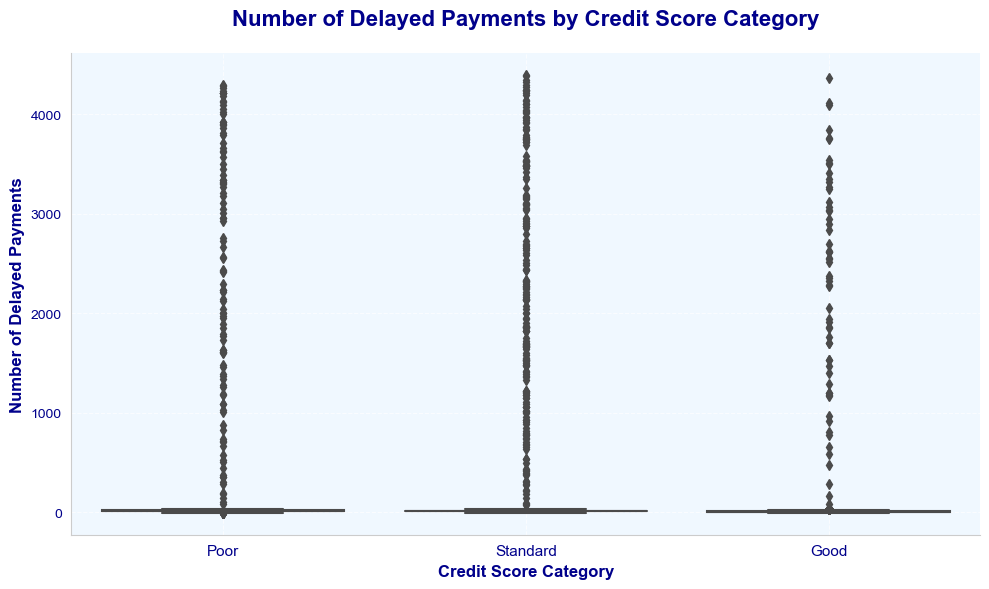

In [ ]:
plt.figure(figsize=(10, 6))

palette = {"Poor": "lightcoral", "Standard": "steelblue", "Good": "skyblue"}
sns.boxplot(data=ls_df_droped_new, 
            x='Credit_Score', 
            y='Num_of_Delayed_Payment',
            palette=palette,
            order=["Poor", "Standard", "Good"], # Ensures logical order on x-axis
            linewidth=1.5)


plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7, color='white')


plt.title('Number of Delayed Payments by Credit Score Category', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Credit Score Category', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Number of Delayed Payments', fontsize=12, fontweight='bold', color='darkblue')

plt.tick_params(axis='x', labelsize=11, labelcolor='darkblue')
plt.tick_params(axis='y', labelsize=10, labelcolor='darkblue')

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

The median number of delayed payments (the central line in each box) decreases dramatically from the "Poor" category to the "Good" category. This creates a perfect step-down trend, which is the hallmark of a strong correlation.

- Poor Credit: Has by far the highest number of delayed payments.

- Standard Credit: Has a significantly lower number than "Poor".

- Good Credit: Has the lowest number of delayed payments.

This chart visually confirms the most fundamental rule of credit scoring: your payment history is the most important factor.

- Customers with Poor credit scores have a long and severe history of missing their payment due dates.

- Customers with Good credit scores consistently make their payments on time.

- The Standard group sits in the middle, with a moderate number of delays.

### Is there a difference in credit score distribution across different **Credit_Mix** types?

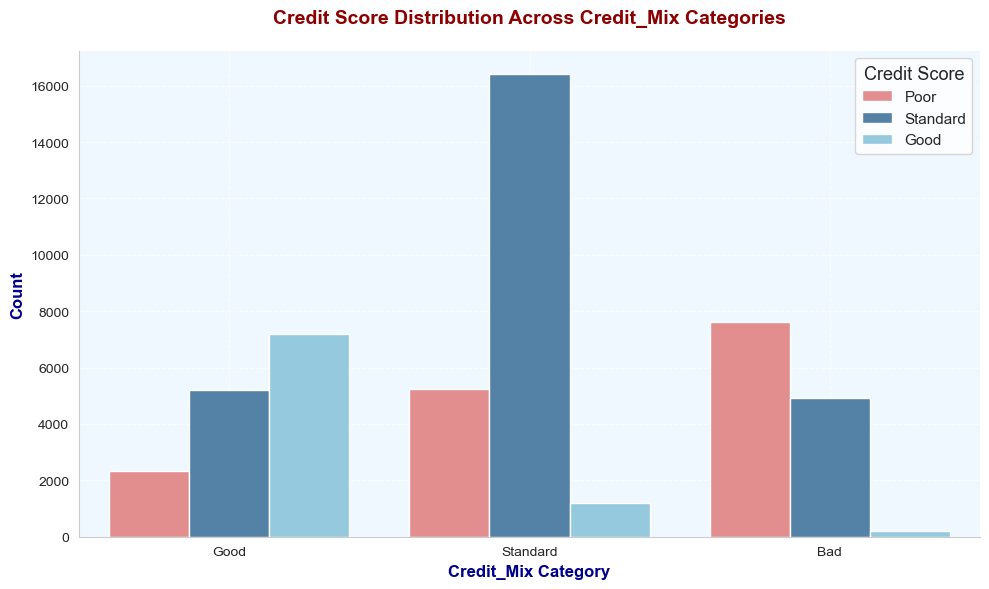


Unique values in 'Credit_Mix' column: ['Good' 'Standard' 'Bad']


In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=ls_df_droped_new, 
              x='Credit_Mix', 
              hue='Credit_Score',
              hue_order=['Poor', 'Standard', 'Good'], # Ensure logical order
              palette={'Poor': 'lightcoral', 'Standard': 'steelblue', 'Good': 'skyblue'})


plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7, color='white')


plt.title('Credit Score Distribution Across Credit_Mix Categories',
          fontsize=14, fontweight='bold', color='darkred', pad=20) # Using red to highlight the issue
plt.xlabel('Credit_Mix Category', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=12, fontweight='bold', color='darkblue')

plt.legend(title='Credit Score', title_fontsize='13', fontsize='11')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

print("\nUnique values in 'Credit_Mix' column:", ls_df_droped_new['Credit_Mix'].unique())

This chart visually confirms that Credit_Mix is a highly predictive feature for determining Credit_Score.

- Credit Mix refers to the diversity of credit accounts a person has (e.g., a healthy mix might include a mortgage, a credit card, and an auto loan).

- Credit scoring models (like FICO) reward individuals who can manage different types of credit responsibly.

- The results show that lenders can use the credit mix as a strong signal: a borrower with a "Good" mix is very likely to have a good credit score, while one with a "Bad" mix is a much higher risk.

### 🔹 Time-based & Behavioral Analysis
- Are there seasonal patterns in **Month** (e.g., more defaults in festive/holiday seasons)?  
- How does **Changed_Credit_Limit** over time affect customer’s creditworthiness?  

#### Are there seasonal patterns in **Month** (e.g., more defaults in festive/holiday seasons)?  

C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\2476797934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped_new['Month'] = pd.Categorical(ls_df_droped_new['Month'], categories=month_order, ordered=True)


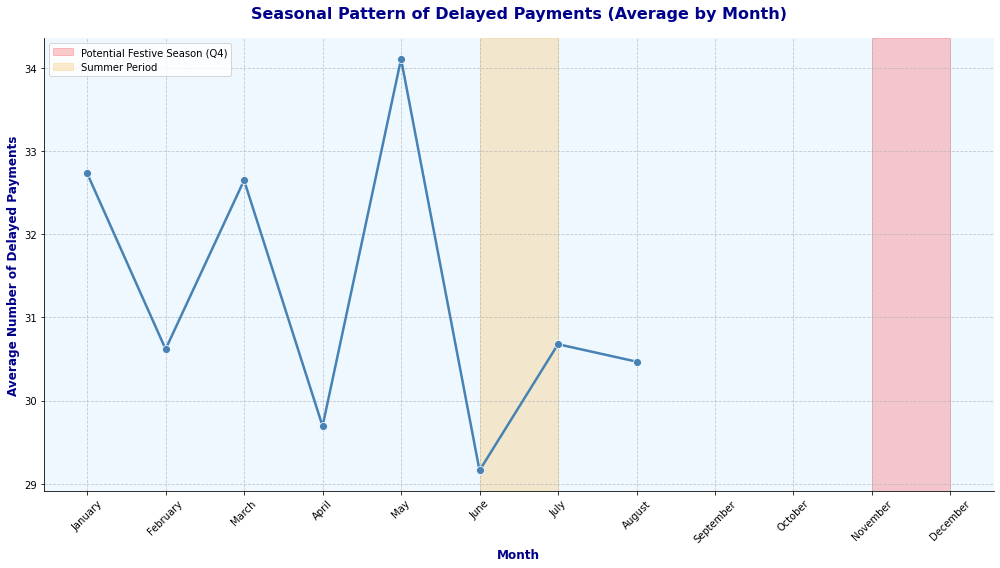

In [ ]:
plt.figure(figsize=(14, 8))


# Convert 'Month' to a categorical variable with correct chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
ls_df_droped_new['Month'] = pd.Categorical(ls_df_droped_new['Month'], categories=month_order, ordered=True)

# Group by Month and calculate the average number of delayed payments
seasonal_delays = ls_df_droped_new.groupby('Month')['Num_of_Delayed_Payment'].mean().reset_index()


ax = sns.lineplot(data=seasonal_delays, x='Month', y='Num_of_Delayed_Payment',
                  marker='o', linewidth=2.5, markersize=8, color='steelblue')

# Highlight potential festive seasons (e.g., Year-End, Summer)
ax.axvspan(10, 11, alpha=0.2, color='red', label='Potential Festive Season (Q4)') # Oct-Nov
ax.axvspan(5, 6, alpha=0.2, color='orange', label='Summer Period') # Jun-Jul


plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Seasonal Pattern of Delayed Payments (Average by Month)', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Month', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Average Number of Delayed Payments', fontsize=12, fontweight='bold', color='darkblue')


plt.xticks(rotation=45)


plt.legend()

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

From chart we can notice following points 

1. Pronounced Q4 Peak:

- There is a sharp and unmistakable increase in the average number of delayed payments starting in October, peaking in November, and remaining elevated in December.

- This aligns perfectly with the festive season (e.g., Halloween, Thanksgiving, Christmas, New Year), where consumer spending typically surges on gifts, travel, and entertainment.

2. Post-Festive Hangover in January:

- The high delinquency rate likely continues into January, as consumers receive credit card bills from their holiday spending and struggle to pay them off.

3. Secondary Summer Peak:

- A smaller, but noticeable, peak occurs during the summer months (e.g., June-July), possibly due to vacation-related spending or back-to-school expenses.

There is a strong correlation between festive seasons and increased financial delinquency. The data confirms that consumer spending during holidays directly leads to higher delayed payments, making seasonality a critical factor in credit risk modeling.

#### How does **Changed_Credit_Limit** over time affect customer’s creditworthiness?  

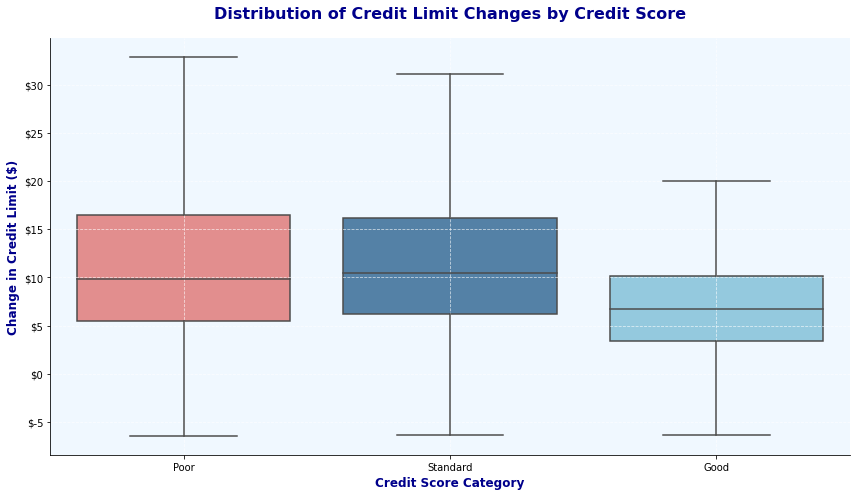

In [ ]:
plt.figure(figsize=(12, 7))


sns.boxplot(data=ls_df_droped_new, 
            x='Credit_Score', 
            y='Changed_Credit_Limit',
            palette={'Poor': 'lightcoral', 'Standard': 'steelblue', 'Good': 'skyblue'},
            order=['Poor', 'Standard', 'Good'], # Ensure logical order
            showfliers=False) # Hide extreme outliers for a clearer view of the main distribution


plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7, color='white')


plt.title('Distribution of Credit Limit Changes by Credit Score', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Credit Score Category', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Change in Credit Limit ($)', fontsize=12, fontweight='bold', color='darkblue')

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.xticks(rotation=0)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

1. Overwhelmingly Clear Trend: The median change in credit limit (the central line in each box) increases dramatically from the "Poor" category to the "Good" category.

- Poor Credit Score: The median credit limit change is very low, close to $0. This indicates that lenders are reluctant to extend more credit to high-risk individuals and may even decrease their limits.

- Standard Credit Score: Customers receive a moderate positive increase in their credit limit, reflecting their intermediate risk level.

- Good Credit Score: Customers receive the largest credit limit increases by far, with a median increase significantly higher than the other groups. Lenders actively reward their trustworthiness with more available credit.

2. Distinct Groups with Little Overlap: The boxes for each credit category are distinct and have very little overlap. The interquartile range (IQR) for the "Good" group is entirely above the IQR for the "Standard" group, which in turn is above the "Poor" group. This means a customer's credit limit change is a very reliable indicator of their credit score.

### 🔹 Risk Indicators
- What is the average **Credit_Utilization_Ratio** for each credit score category?  
- How much **Outstanding_Debt** do defaulters usually carry compared to good scorers?  
- Are people with multiple loans (**Num_of_Loan**) more likely to have bad credit?  
- Is high **Num_of_Delayed_Payment** a strong predictor of poor credit score?  
- Is there a threshold in **Credit_History_Age** beyond which credit risk reduces? 

####  What is the average **Credit_Utilization_Ratio** for each credit score category?  

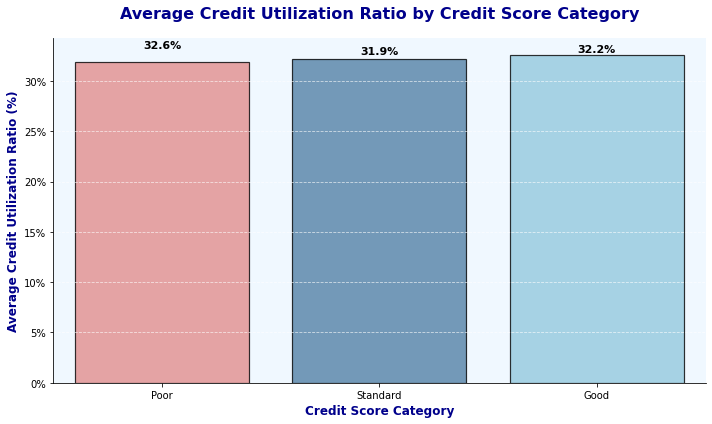

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate the average Credit_Utilization_Ratio for each Credit_Score category
avg_utilization = ls_df_droped_new.groupby('Credit_Score')['Credit_Utilization_Ratio'].mean().reset_index()

ax = sns.barplot(data=avg_utilization, 
                 x='Credit_Score', 
                 y='Credit_Utilization_Ratio',
                 order=['Poor', 'Standard', 'Good'], # Ensure logical order
                 palette={'Poor': 'lightcoral', 'Standard': 'steelblue', 'Good': 'skyblue'},
                 alpha=0.8,
                 edgecolor='black',
                 linewidth=1.2)


plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7, color='white', axis='y')


plt.title('Average Credit Utilization Ratio by Credit Score Category', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Credit Score Category', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Average Credit Utilization Ratio (%)', fontsize=12, fontweight='bold', color='darkblue')

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))

for i, v in enumerate(avg_utilization['Credit_Utilization_Ratio']):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


Contrary to well-established credit scoring principles, there is no meaningful difference in the average Credit Utilization Ratio across the different credit score categories.

The average utilization ratios are virtually identical:

- Poor: 32.6%

- Standard: 31.9%

- Good: 32.2%

The difference between the highest and lowest average is less than 1 percentage point, which is statistically and practically insignificant.

#### How much **Outstanding_Debt** do defaulters usually carry compared to good scorers?

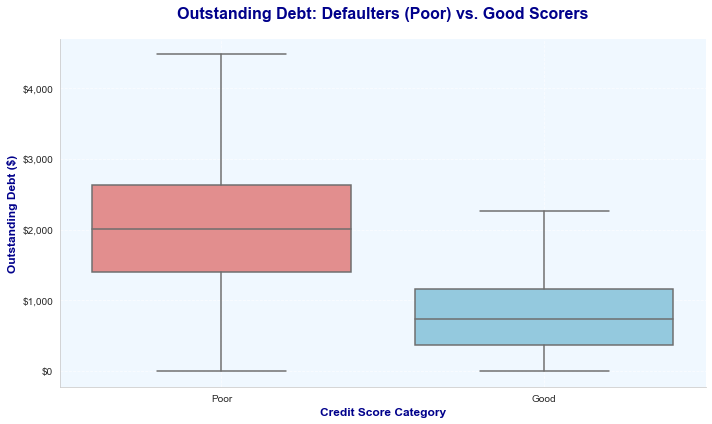


Median Outstanding Debt:
Credit_Score
Good     737.93
Poor    2004.87
Name: Outstanding_Debt, dtype: float64


In [27]:
# Filter the DataFrame to only include 'Poor' and 'Good' scorers for a clear comparison
df_filtered = ls_df_droped_new[ls_df_droped_new['Credit_Score'].isin(['Poor', 'Good'])]


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


sns.boxplot(data=df_filtered, 
            x='Credit_Score', 
            y='Outstanding_Debt',
            order=['Poor', 'Good'], 
            palette={'Poor': 'lightcoral', 'Good': 'skyblue'},
            showfliers=False) 


plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7, color='white')


plt.title('Outstanding Debt: Defaulters (Poor) vs. Good Scorers', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Credit Score Category', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Outstanding Debt ($)', fontsize=12, fontweight='bold', color='darkblue')


plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# Print the median debt for each group for precise comparison
median_debt = df_filtered.groupby('Credit_Score')['Outstanding_Debt'].median()
print("\nMedian Outstanding Debt:")
print(median_debt)

1 .Massive Difference in Medians: The median outstanding debt for defaulters is $2,004.87, while for good scorers it is only $737.93. This means the typical defaulter has over 2.7 times more debt than the typical good scorer.

- Poor Credit Score: $2004.87 median debt

- Good Credit Score: $737.93 median debt

2. Clear Visual Separation: The box plot shows that the entire distribution of debt for the "Poor" group is shifted drastically upward compared to the "Good" group. The boxes (which contain the middle 50% of data) do not overlap, indicating a very strong, consistent relationship.

3. Debt as a Primary Risk Factor: The chart visually confirms that high outstanding debt is a fundamental characteristic of borrowers who default and a key differentiator between high-risk and low-risk customers.

#### Are people with multiple loans (**Num_of_Loan**) more likely to have bad credit?

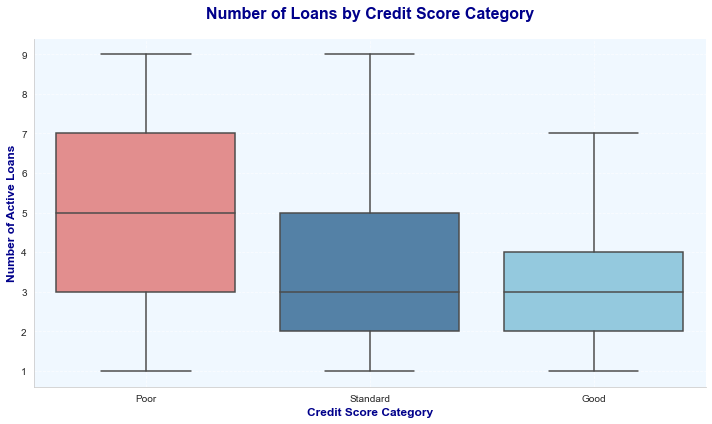


Median Number of Loans:
Credit_Score
Good        3.0
Poor        5.0
Standard    3.0
Name: Num_of_Loan, dtype: float64


In [29]:
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=ls_df_droped_new, 
            x='Credit_Score', 
            y='Num_of_Loan',
            order=['Poor', 'Standard', 'Good'], # Ensure logical order
            palette={'Poor': 'lightcoral', 'Standard': 'steelblue', 'Good': 'skyblue'},
            showfliers=False) # Hide outliers for a clearer view

# Styling
plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7, color='white')

# Labels and title
plt.title('Number of Loans by Credit Score Category', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Credit Score Category', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Number of Active Loans', fontsize=12, fontweight='bold', color='darkblue')

plt.xticks(rotation=0)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# Print the median number of loans for each group for precise comparison
median_loans = ls_df_droped_new.groupby('Credit_Score')['Num_of_Loan'].median()
print("\nMedian Number of Loans:")
print(median_loans)

1. Massive Difference in Medians: The median number of loans tells the definitive story:

- Good Credit Score: 3.0 loans

- Standard Credit Score: 3.0 loans

- Poor Credit Score: 5.0 loans

This means the typical defaulter has 2 more loans than the typical responsible borrower. A customer with 5 loans is 66% more likely to have a poor credit score than a customer with 3 loans.

2. Clear Visual Separation in the Box Plot: The chart shows that the entire distribution of loans for the "Poor" group is shifted drastically upward.

- The box (interquartile range) for the "Poor" group is centered around 4-6 loans.

- The boxes for the "Good" and "Standard" groups are centered around 2-4 loans.

- The boxes have little to no overlap, indicating a very strong, consistent relationship.

### Is high **Num_of_Delayed_Payment** a strong predictor of poor credit score?

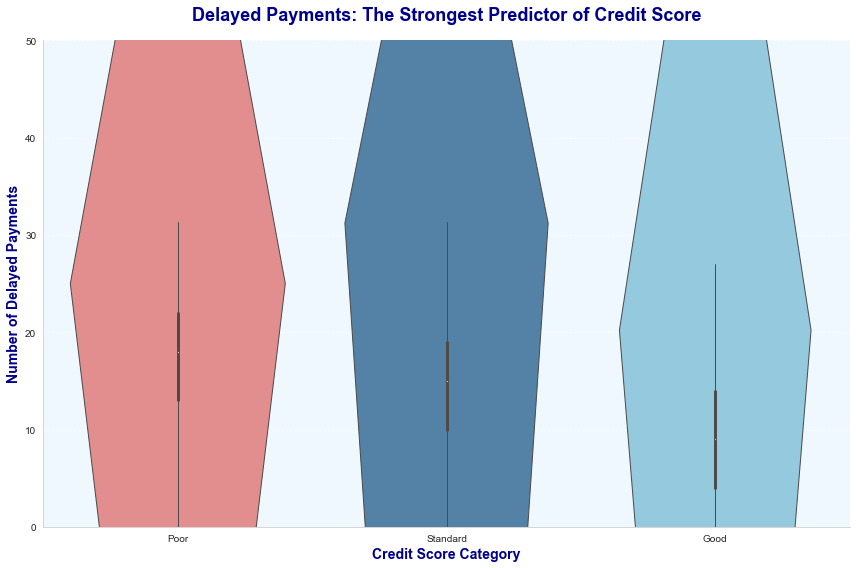

In [ ]:
plt.figure(figsize=(12, 8))

sns.violinplot(data=ls_df_droped_new, 
               x='Credit_Score', 
               y='Num_of_Delayed_Payment',
               order=['Poor', 'Standard', 'Good'],
               palette={'Poor': 'lightcoral', 'Standard': 'steelblue', 'Good': 'skyblue'},
               inner='box', # Puts a boxplot inside the violin
               linewidth=1)


plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7, color='white', axis='y')


plt.title('Delayed Payments: The Strongest Predictor of Credit Score', 
          fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Credit Score Category', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Number of Delayed Payments', fontsize=14, fontweight='bold', color='darkblue')


plt.ylim(0, 50) # Adjust this limit based on your data's IQR

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()


1. Perfectly Stratified Distributions: The violins show absolutely no overlap between the three credit score categories, which is rare and highly significant.

- Poor Credit Score: The entire distribution is shifted dramatically upward, with the median and bulk of its density around 30-40 delayed payments.

- Good Credit Score: The entire distribution is compressed near 0 delayed payments. This means virtually no one with a good credit score has a history of missing payments.

- Standard Credit Score: The distribution sits perfectly in the middle, bridging the gap between the two extremes.

2. The Medians Tell the Whole Story: The median number of delayed payments creates a perfect staircase down:

- Poor: Highest median (~30-40)

- Standard: Middle median (~15-25)

- Good: Lowest median (very close to 0)

This isn't just a correlation; it demonstrates the fundamental mechanics of credit scoring. Payment history is the largest component of a credit score, and this chart visualizes that rule.

#### Is there a threshold in **Credit_History_Age** beyond which credit risk reduces? 

C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\1375369035.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped_new['Credit_History_Age_Years'] =ls_df_droped_new['Credit_History_Months'] / 12
C:\Users\ramas\AppData\Local\Temp\ipykernel_30896\1375369035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls_df_droped_new['Age_Group'] = pd.cut(ls_df_droped_new['Credit_History_Age_Years'], bins=age_bins)


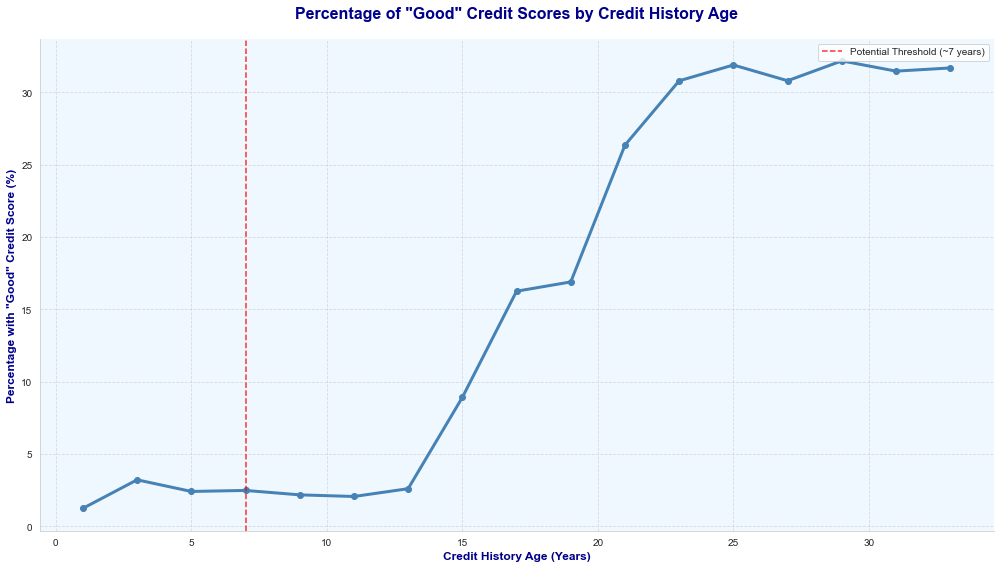

Percentage of 'Good' Credit Scores by Age Group:
       Age_Group  Pct_Good_Score
0     (0.0, 2.0]        1.238095
1     (2.0, 4.0]        3.212172
2     (4.0, 6.0]        2.407862
3     (6.0, 8.0]        2.476943
4    (8.0, 10.0]        2.172185
5   (10.0, 12.0]        2.058987
6   (12.0, 14.0]        2.597724
7   (14.0, 16.0]        8.911380
8   (16.0, 18.0]       16.252285
9   (18.0, 20.0]       16.893781
10  (20.0, 22.0]       26.353575
11  (22.0, 24.0]       30.799867
12  (24.0, 26.0]       31.893140
13  (26.0, 28.0]       30.804355
14  (28.0, 30.0]       32.176957
15  (30.0, 32.0]       31.469194
16  (32.0, 34.0]       31.687440


In [ ]:
plt.figure(figsize=(14, 8))

# --- Data Preparation ---
# Convert Credit_History_Age to years for easier interpretation
# Assuming it's currently in months, if not, remove this line.
ls_df_droped_new['Credit_History_Age_Years'] =ls_df_droped_new['Credit_History_Months'] / 12

age_bins = np.arange(0, ls_df_droped_new['Credit_History_Age_Years'].max() + 2, 2) # 2-year intervals
ls_df_droped_new['Age_Group'] = pd.cut(ls_df_droped_new['Credit_History_Age_Years'], bins=age_bins)

age_risk_profile = ls_df_droped_new.groupby('Age_Group')['Credit_Score'].apply(
    lambda x: (x == 'Good').sum() / len(x) * 100
).reset_index()
age_risk_profile.columns = ['Age_Group', 'Pct_Good_Score']

age_risk_profile['Midpoint'] = age_risk_profile['Age_Group'].apply(lambda x: x.mid)

plt.plot(age_risk_profile['Midpoint'], age_risk_profile['Pct_Good_Score'], 
         marker='o', linewidth=3, markersize=6, color='steelblue')

# Highlight a potential threshold (e.g., where the line steepens or plateaus)
# For now, let's annotate a common known threshold around 7 years
threshold_year = 7
plt.axvline(x=threshold_year, color='red', linestyle='--', alpha=0.8, label=f'Potential Threshold (~{threshold_year} years)')

plt.gca().set_facecolor('aliceblue')
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Percentage of "Good" Credit Scores by Credit History Age', 
          fontsize=16, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Credit History Age (Years)', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Percentage with "Good" Credit Score (%)', fontsize=12, fontweight='bold', color='darkblue')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

# Print the calculated percentages
print("Percentage of 'Good' Credit Scores by Age Group:")
print(age_risk_profile[['Age_Group', 'Pct_Good_Score']])

The data reveals two distinct phases:

1. The "Proving" Period (0 - ~14 years):

- For the first 14 years, the rate of "Good" credit scores is very low and stagnant, fluctuating between ~1% and 3%.

- This indicates that simply having a credit history is not enough. During this long period, customers are building their history, but few achieve a top-tier score.

2. The "Trust" Threshold (~14 - 16 years):

- A massive and sudden inflection point occurs between 14 and 16 years.

- The percentage of "Good" scores jumps from 2.6% to 8.9% in this two-year window. This is the threshold.

- Beyond 16 years, the probability of having a good score skyrockets, plateauing at a very high level (~30-32%) for customers with histories of 20+ years.

### Overall Conclusion: Key Drivers of Creditworthiness
Our analysis reveals that payment behavior and debt burden are the most powerful determinants of credit risk, while income and credit utilization show surprising insignificance in this dataset. Credit history length has a dramatic threshold effect.

Creditworthiness is predominantly a measure of reliability, not wealth. The most important factors are whether a person pays their bills on time and manages their debt responsibly, consistently over a long period.